# Proyek Analisis Data: Nama dataset
- Kelompok :
- Anggota : </br>
10124049 - Muhammad Dwi Putra</br>
10124052 - Reza Alam</br>
10124060 - Muhammad Bilal</br>
10124066 - Rogio Fardan Yamiharja</br>
10124067 - Gifari Raya Shahizidan</br>
10124074 - Muhammad Rigan M.P</br>

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi nilai pesanan (order value), dan kota/negara bagian mana yang menyumbang pendapatan dan jumlah pesanan terbanyak? - 10124049 - Muhammad Dwi Putra
- Berapa rata-rata waktu pengiriman dari tanggal pembelian hingga barang tiba (delivery time)? Apakah ada korelasi antara jarak (menggunakan data geolokasi) atau negara bagian asal/tujuan dengan keterlambatan pengiriman? - 10124052 - Reza Alam
- Bagaimana distribusi nilai ulasan (review score) secara keseluruhan, dan apakah ada perbedaan signifikan dalam skor ulasan antara pesanan yang dikirimkan tepat waktu (delivered on time) versus yang terlambat? - 10124060 - Muhammad Bilal
- Kategori produk apa yang memiliki skor ulasan rata-rata terendah dan paling sering menjadi subjek keluhan (dilihat dari kolom review_comment_message jika tersedia)? - 10124066 - Rogio Fardan Yamiharja
- Analisis performa rategori produk mana yang paling populer (berdasarkan jumlah pesanan) dan kategori mana yang menghasilkan total pendapatan tertinggi? Apakah kategori-kategori ini memiliki ukuran dan berat produk yang khas? - 10124067 - Gifari Raya Shahizidan
- Bagaimana distribusi penjual berdasarkan jumlah pesanan yang mereka terima? Apakah 10% penjual teratas (Top 10% Sellers) juga memiliki skor ulasan rata-rata yang lebih tinggi? - 10124074 - Muhammad Rigan M.P

## Menyiapkan semua library yang dibuthkan

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [53]:
import os
print(os.listdir('.'))

['.config', 'E-commerce-public-dataset', '.ipynb_checkpoints', 'Screenshot 2026-01-27 142408.png', 'sample_data']


## Data Wrangling
Tahapan ini merupakan tahapan untuk mempersiapkan data mentah menjadi bentuk yang lebih bersih, terstruktur, dan siap digunakan untuk proses analisis data. pada tahapan ini terdiri dari


1.   Gathering Data
2.   Assessing Data
3. Cleaning Data



### Gathering Data (Pengumpulan Data)
ini merupakan tahapan dalam pengumpulan data dari berbagai sumber, disini merupakan tahapan import dataset kedalam notebook

In [54]:
customers_df = pd.read_csv('E-commerce-public-dataset/customers_dataset.csv')
geolocation_df = pd.read_csv('E-commerce-public-dataset/geolocation_dataset.csv')
order_items_df = pd.read_csv('E-commerce-public-dataset/order_items_dataset.csv')
order_payments_df = pd.read_csv('E-commerce-public-dataset/order_payments_dataset.csv')
order_reviews_df = pd.read_csv('E-commerce-public-dataset/order_reviews_dataset.csv')
orders_df = pd.read_csv('E-commerce-public-dataset/orders_dataset.csv')
category_translation_df = pd.read_csv('E-commerce-public-dataset/product_category_name_translation.csv')
products_df = pd.read_csv('E-commerce-public-dataset/products_dataset.csv')
sellers_df = pd.read_csv('E-commerce-public-dataset/sellers_dataset.csv')

In [55]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [56]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [57]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [58]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [59]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [60]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [61]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [62]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [63]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [64]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [65]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [66]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [67]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [68]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [69]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [70]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [71]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [72]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [73]:
category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [74]:
category_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [75]:
category_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [76]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [77]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [78]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [79]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [80]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [81]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


### Assessing Data (Penilaian Data)
ini merupakan tahapan untuk melakukan evaluasi data untuk mengidentifikasi masalah kualitas dan struktur data yang dapat mempengaruhi analisis dari mulai missing value, pencilan, ataupun tipe data yang tidak sesuai

In [82]:
print(customers_df.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [83]:
print(geolocation_df.isnull().sum())

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [84]:
print(order_items_df.isnull().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [85]:
print(order_payments_df.isnull().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [86]:
print(order_reviews_df.isnull().sum())

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [87]:
print(orders_df.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [88]:
print(category_translation_df.isnull().sum())

product_category_name            0
product_category_name_english    0
dtype: int64


In [89]:
print(products_df.isnull().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [90]:
print(sellers_df.isnull().sum())

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


### Pencicilan

In [91]:
# Pastikan tipe data benar
customers_df['customer_zip_code_prefix'] = customers_df['customer_zip_code_prefix'].astype(int)

# Hitung IQR
Q1 = customers_df['customer_zip_code_prefix'].quantile(0.25)
Q3 = customers_df['customer_zip_code_prefix'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Buat kolom outlier
customers_df['zip_outlier'] = customers_df['customer_zip_code_prefix'].apply(
    lambda x: 1 if x < lower or x > upper else 0
)

print(customers_df['zip_outlier'].value_counts())

print("\n--- Frekuensi Customer Unique ID (Cari yang Frekuensinya 1) ---")
# Menampilkan 5 ID paling jarang (frekuensi terendah)
print(customers_df['customer_unique_id'].value_counts().tail(5))

print("\n Kota paling jarang muncul")
print(customers_df['customer_city'].value_counts())

print("\nNEgara bagian paling jarang muncul")
print(customers_df['customer_state'].value_counts())

zip_outlier
0    99441
Name: count, dtype: int64

--- Frekuensi Customer Unique ID (Cari yang Frekuensinya 1) ---
customer_unique_id
4f83c83b7ff5b544a8c75dcb8ad66e2e    1
3fe413dde400746c53c5d0d38b266ca2    1
289e1d1ce11a14bb169775d58ad2f1c2    1
ec83d060d9a0abba4b409c544c744c2f    1
211e4234ffca5cec9b0ab183a1009256    1
Name: count, dtype: int64

 Kota paling jarang muncul
customer_city
sao paulo                   15540
rio de janeiro               6882
belo horizonte               2773
brasilia                     2131
curitiba                     1521
                            ...  
olhos d'agua                    1
pacotuba                        1
sao sebastiao do paraiba        1
benedito leite                  1
campos verdes                   1
Name: count, Length: 4119, dtype: int64

NEgara bagian paling jarang muncul
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336


In [92]:
## OUTLIER LATITUDE (IQR)
Q1_lat = geolocation_df['geolocation_lat'].quantile(0.25)
Q3_lat = geolocation_df['geolocation_lat'].quantile(0.75)
IQR_lat = Q3_lat - Q1_lat

lower_lat = Q1_lat - 1.5 * IQR_lat
upper_lat = Q3_lat + 1.5 * IQR_lat

geolocation_df['lat_outlier'] = geolocation_df['geolocation_lat'].apply(
    lambda x: 1 if x < lower_lat or x > upper_lat else 0
)

## OUTLIER LONGITUDE (IQR)
Q1_lng = geolocation_df['geolocation_lng'].quantile(0.25)
Q3_lng = geolocation_df['geolocation_lng'].quantile(0.75)
IQR_lng = Q3_lng - Q1_lng

lower_lng = Q1_lng - 1.5 * IQR_lng
upper_lng = Q3_lng + 1.5 * IQR_lng

geolocation_df['lng_outlier'] = geolocation_df['geolocation_lng'].apply(
    lambda x: 1 if x < lower_lng or x > upper_lng else 0
)

print("--- Outlier Latitude ---")
print(geolocation_df['lat_outlier'].value_counts())

print("\n--- Outlier Longitude ---")
print(geolocation_df['lng_outlier'].value_counts())

--- Outlier Latitude ---
lat_outlier
0    831923
1    168240
Name: count, dtype: int64

--- Outlier Longitude ---
lng_outlier
0    957815
1     42348
Name: count, dtype: int64


In [93]:
# OUTLIER PRICE (IQR)
Q1 = order_items_df['price'].quantile(0.25)
Q3 = order_items_df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_price = Q1 - 1.5 * IQR
upper_price = Q3 + 1.5 * IQR

order_items_df['price_outlier'] = order_items_df['price'].apply(
    lambda x: 1 if x < lower_price or x > upper_price else 0
)

# OUTLIER FREIGHT_VALUE (IQR)
Q1_f = order_items_df['freight_value'].quantile(0.25)
Q3_f = order_items_df['freight_value'].quantile(0.75)
IQR_f = Q3_f - Q1_f

lower_freight = Q1_f - 1.5 * IQR_f
upper_freight = Q3_f + 1.5 * IQR_f

order_items_df['freight_outlier'] = order_items_df['freight_value'].apply(
    lambda x: 1 if x < lower_freight or x > upper_freight else 0
)

print(order_items_df['price_outlier'].value_counts())

print(order_items_df['freight_outlier'].value_counts())

price_outlier
0    104223
1      8427
Name: count, dtype: int64
freight_outlier
0    100516
1     12134
Name: count, dtype: int64


In [94]:
## OUTLIER PAYMENT VALUE (IQR)
Q1_v = order_payments_df['payment_value'].quantile(0.25)
Q3_v = order_payments_df['payment_value'].quantile(0.75)
IQR_v = Q3_v - Q1_v

lower_value = Q1_v - 1.5 * IQR_v
upper_value = Q3_v + 1.5 * IQR_v

order_payments_df['value_outlier'] = order_payments_df['payment_value'].apply(
    lambda x: 1 if x < lower_value or x > upper_value else 0
)

## OUTLIER PAYMENT INSTALLMENTS (IQR)
Q1_i = order_payments_df['payment_installments'].quantile(0.25)
Q3_i = order_payments_df['payment_installments'].quantile(0.75)
IQR_i = Q3_i - Q1_i

lower_installments = Q1_i - 1.5 * IQR_i
upper_installments = Q3_i + 1.5 * IQR_i

order_payments_df['installments_outlier'] = order_payments_df['payment_installments'].apply(
    lambda x: 1 if x < lower_installments or x > upper_installments else 0
)

print(order_payments_df['value_outlier'].value_counts())
print()
print(order_payments_df['installments_outlier'].value_counts())

value_outlier
0    95905
1     7981
Name: count, dtype: int64

installments_outlier
0    97573
1     6313
Name: count, dtype: int64


In [95]:
from datetime import timedelta

# ASUMSI: orders_df sudah dimuat. Jika belum, ganti bagian ini dengan kode loading data Anda.
# Contoh Data Dummy (Harap HAPUS jika Anda sudah punya orders_df Anda sendiri!)
np.random.seed(42)
base_time = pd.to_datetime('2018-01-01 10:00:00')
orders_df = pd.DataFrame({
    'order_id': [f'O{i:04d}' for i in range(100)],
    'customer_id': [f'C{i:04d}' for i in range(100)],
    'order_status': ['delivered'] * 95 + ['canceled'] * 3 + ['shipped'] * 2,
    'order_purchase_timestamp': base_time + pd.to_timedelta(np.arange(100), unit='h'),
})
# Menambahkan data tanggal yang disengaja memiliki outlier durasi
orders_df['order_approved_at'] = orders_df['order_purchase_timestamp'] + pd.to_timedelta(
    np.concatenate([np.random.randint(0, 2, 97), [5, 10, 0]]), unit='h'
)
orders_df['order_delivered_carrier_date'] = orders_df['order_approved_at'] + pd.to_timedelta(np.random.randint(1, 5, 100), unit='d')
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_carrier_date'] + pd.to_timedelta(
    np.concatenate([np.random.randint(5, 15, 97), [30, 45, 1]]), unit='d'
)
orders_df['estimated_delivery_date'] = orders_df['order_delivered_customer_date'] + pd.to_timedelta(np.random.randint(1, 3, 100), unit='d')

## 1. Konversi ke Tipe Datetime
timestamp_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'estimated_delivery_date'
]
for col in timestamp_cols:
    # Error handling jika kolom tidak ada (meskipun seharusnya ada berdasarkan gambar)
    if col in orders_df.columns:
        orders_df[col] = pd.to_datetime(orders_df[col], errors='coerce')


## 2. Perhitungan Durasi Waktu

# A. Durasi Persetujuan (Approval Duration) dalam JAM
# Waktu persetujuan - Waktu pembelian
orders_df['approval_duration_hours'] = (
    orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']
).dt.total_seconds() / 3600

# B. Durasi Pengiriman (Delivery Duration) dalam HARI
# Waktu pengiriman ke pelanggan - Waktu dikirim kurir
orders_df['delivery_duration_days'] = (
    orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']
).dt.total_seconds() / (3600 * 24)

## 3. Deteksi Outlier (IQR) pada Durasi Waktu

### OUTLIER APPROVAL DURATION (IQR)
Q1_app = orders_df['approval_duration_hours'].quantile(0.25)
Q3_app = orders_df['approval_duration_hours'].quantile(0.75)
IQR_app = Q3_app - Q1_app

lower_app = Q1_app - 1.5 * IQR_app
upper_app = Q3_app + 1.5 * IQR_app

orders_df['approval_duration_outlier'] = orders_df['approval_duration_hours'].apply(
    lambda x: 1 if x < lower_app or x > upper_app else 0
)

print("--- Hasil Outlier Durasi Persetujuan (Approval Duration) ---")
print(orders_df['approval_duration_outlier'].value_counts())
print(f"\nBatas Atas Persetujuan: {round(upper_app, 2)} jam")

### OUTLIER DELIVERY DURATION (IQR)
Q1_del = orders_df['delivery_duration_days'].quantile(0.25)
Q3_del = orders_df['delivery_duration_days'].quantile(0.75)
IQR_del = Q3_del - Q1_del

lower_del = Q1_del - 1.5 * IQR_del
upper_del = Q3_del + 1.5 * IQR_del

orders_df['delivery_duration_outlier'] = orders_df['delivery_duration_days'].apply(
    lambda x: 1 if x < lower_del or x > upper_del else 0
)

print("\n--- Hasil Outlier Durasi Pengiriman (Delivery Duration) ---")
print(orders_df['delivery_duration_outlier'].value_counts())
print(f"\nBatas Atas Pengiriman: {round(upper_del, 2)} hari")


# --------------------------------------------------------------------------------------
## 4. Analisis Frekuensi (Status Pesanan)

print("\n--- Frekuensi Status Pesanan (order_status) ---")
print(orders_df['order_status'].value_counts())

--- Hasil Outlier Durasi Persetujuan (Approval Duration) ---
approval_duration_outlier
0    98
1     2
Name: count, dtype: int64

Batas Atas Persetujuan: 2.5 jam

--- Hasil Outlier Durasi Pengiriman (Delivery Duration) ---
delivery_duration_outlier
0    98
1     2
Name: count, dtype: int64

Batas Atas Pengiriman: 17.0 hari

--- Frekuensi Status Pesanan (order_status) ---
order_status
delivered    95
canceled      3
shipped       2
Name: count, dtype: int64


In [96]:
Q1_rev = order_reviews_df['review_score'].quantile(0.25)
Q3_rev = order_reviews_df['review_score'].quantile(0.75)
IQR_rev = Q3_rev - Q1_rev

lower_rev = Q1_rev - 1.5 * IQR_rev
upper_rev = Q3_rev + 1.5 * IQR_rev

order_reviews_df['review_outlier'] = order_reviews_df['review_score'].apply(
    lambda x: 1 if x < lower_rev or x > upper_rev else 0
)

print("Outlier Review Score:", order_reviews_df['review_outlier'].value_counts())

print("\n--- Paling jarang memberikan review ---")
print(order_reviews_df['review_id'].value_counts().tail())


Outlier Review Score: review_outlier
0    84649
1    14575
Name: count, dtype: int64

--- Paling jarang memberikan review ---
review_id
ca475b77fcc618551ef9d516c3f61b88    1
95a8d0270bdd512d3c2e03a885f21d27    1
93016126c7a3060a49c6975fab7a9c16    1
0a77ca646b0b9b7a209e97589adf9d88    1
11d8992bd767ff693cfa2fb3f930f65a    1
Name: count, dtype: int64


In [97]:
orders_df['delivery_days'] = (
    pd.to_datetime(orders_df['order_delivered_customer_date']) -
    pd.to_datetime(orders_df['order_purchase_timestamp'])
).dt.days

Q1_del = orders_df['delivery_days'].quantile(0.25)
Q3_del = orders_df['delivery_days'].quantile(0.75)
IQR_del = Q3_del - Q1_del

lower_del = Q1_del - 1.5 * IQR_del
upper_del = Q3_del + 1.5 * IQR_del

orders_df['delivery_outlier'] = orders_df['delivery_days'].apply(
    lambda x: 1 if x < lower_del or x > upper_del else 0
)

print("Outlier Delivery:", orders_df['delivery_outlier'].value_counts())

print("\nStatus order paling jarang:")
print(orders_df['order_status'].value_counts().tail())


Outlier Delivery: delivery_outlier
0    98
1     2
Name: count, dtype: int64

Status order paling jarang:
order_status
delivered    95
canceled      3
shipped       2
Name: count, dtype: int64


In [98]:
print("\nKategori bahasa Inggris paling jarang muncul:")
print(category_translation_df['product_category_name_english'].value_counts().tail())



Kategori bahasa Inggris paling jarang muncul:
product_category_name_english
flowers                      1
arts_and_craftmanship        1
diapers_and_hygiene          1
fashion_childrens_clothes    1
security_and_services        1
Name: count, dtype: int64


In [99]:
Q1_w = products_df['product_weight_g'].quantile(0.25)
Q3_w = products_df['product_weight_g'].quantile(0.75)
IQR_w = Q3_w - Q1_w

lower_w = Q1_w - 1.5 * IQR_w
upper_w = Q3_w + 1.5 * IQR_w

products_df['weight_outlier'] = products_df['product_weight_g'].apply(
    lambda x: 1 if x < lower_w or x > upper_w else 0
)

print("Outlier Product Weight:", products_df['weight_outlier'].value_counts())

print("\n--- Ukuran produk jarang muncul ---")
print(products_df['product_length_cm'].value_counts().tail())


Outlier Product Weight: weight_outlier
0    28400
1     4551
Name: count, dtype: int64

--- Ukuran produk jarang muncul ---
product_length_cm
96.0    4
10.0    3
8.0     2
9.0     2
7.0     1
Name: count, dtype: int64


In [100]:
sellers_df['seller_zip_code_prefix'] = sellers_df['seller_zip_code_prefix'].astype(int)

Q1_s = sellers_df['seller_zip_code_prefix'].quantile(0.25)
Q3_s = sellers_df['seller_zip_code_prefix'].quantile(0.75)
IQR_s = Q3_s - Q1_s

lower_s = Q1_s - 1.5 * IQR_s
upper_s = Q3_s + 1.5 * IQR_s

sellers_df['zip_outlier'] = sellers_df['seller_zip_code_prefix'].apply(
    lambda x: 1 if x < lower_s or x > upper_s else 0
)

print("Outlier Seller ZIP:", sellers_df['zip_outlier'].value_counts())

print("\nKota seller paling jarang:")
print(sellers_df['seller_city'].value_counts().tail())


Outlier Seller ZIP: zip_outlier
0    3095
Name: count, dtype: int64

Kota seller paling jarang:
seller_city
ipua                                      1
muqui                                     1
timoteo                                   1
pouso alegre                              1
rio de janeiro, rio de janeiro, brasil    1
Name: count, dtype: int64


### Cleaning Data (Pembersihan Data)
ini merupakan tahapan penghapusan atau koreksi data yang bermasalah untuk memastikan data siap dianalisa

In [101]:
# 1. Cleaning Missing Value
customers_df.dropna(subset=['customer_zip_code_prefix'], inplace=True)
customers_df.reset_index(drop=True, inplace=True)

print("Jumlah baris setelah cleaning missing value:", len(customers_df))


# 2. Cleaning Outlier (IQR)
Q1 = customers_df['customer_zip_code_prefix'].quantile(0.25)
Q3 = customers_df['customer_zip_code_prefix'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Simpan jumlah sebelum
before_outlier = len(customers_df)

# Filtering
customers_df_clean = customers_df[
    (customers_df['customer_zip_code_prefix'] >= lower) &
    (customers_df['customer_zip_code_prefix'] <= upper)
]

# Simpan jumlah setelah
after_outlier = len(customers_df_clean)

# Hitung jumlah baris dihapus
deleted_rows = before_outlier - after_outlier

print("Jumlah baris sebelum outlier cleaning:", before_outlier)
print("Jumlah baris sesudah outlier cleaning:", after_outlier)
print("Jumlah baris yang dihapus karena outlier:", deleted_rows)

customers_df_clean



Jumlah baris setelah cleaning missing value: 99441
Jumlah baris sebelum outlier cleaning: 99441
Jumlah baris sesudah outlier cleaning: 99441
Jumlah baris yang dihapus karena outlier: 0


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,zip_outlier
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,0
...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,0
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,0
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,0
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,0


In [102]:
# Pastikan geolocation_df sudah didefinisikan dan berisi data Anda

# ============================================================
# OUTLIER LATITUDE (Double IQR Cleaning)
# ============================================================

# --- Tahap 1 Latitude ---
Q1_lat = geolocation_df['geolocation_lat'].quantile(0.25)
Q3_lat = geolocation_df['geolocation_lat'].quantile(0.75)
IQR_lat = Q3_lat - Q1_lat

lower_lat_1 = Q1_lat - 1.5 * IQR_lat
upper_lat_1 = Q3_lat + 1.5 * IQR_lat

# Tandai outlier tahap 1
geolocation_df['lat_outlier_1'] = geolocation_df['geolocation_lat'].apply(
    lambda x: 1 if x < lower_lat_1 or x > upper_lat_1 else 0
)

# Hanya ambil yang bukan outlier tahap 1 untuk Latitude
geo_lat_stage1 = geolocation_df[geolocation_df['lat_outlier_1'] == 0].copy()

# --- Tahap 2 Latitude ---
Q1_lat2 = geo_lat_stage1['geolocation_lat'].quantile(0.25)
Q3_lat2 = geo_lat_stage1['geolocation_lat'].quantile(0.75)
IQR_lat2 = Q3_lat2 - Q1_lat2

lower_lat_2 = Q1_lat2 - 1.5 * IQR_lat2
upper_lat_2 = Q3_lat2 + 1.5 * IQR_lat2

# Tandai outlier tahap 2
geo_lat_stage1['lat_outlier_2'] = geo_lat_stage1['geolocation_lat'].apply(
    lambda x: 1 if x < lower_lat_2 or x > upper_lat_2 else 0
)

# Data bersih Latitude (bukan outlier tahap 2)
geo_lat_clean_data = geo_lat_stage1[geo_lat_stage1['lat_outlier_2'] == 0]

print("--- DOUBLE OUTLIER LATITUDE ---")
print("Outlier Tahap 1:", geolocation_df['lat_outlier_1'].sum())
print("Sisa setelah Tahap 1:", len(geo_lat_stage1))
print("Outlier Tahap 2:", geo_lat_stage1['lat_outlier_2'].sum())
print("Sisa akhir setelah Tahap 2 (Latitude):", len(geo_lat_clean_data))


# ============================================================
# OUTLIER LONGITUDE (Double IQR Cleaning)
# ============================================================

# --- Tahap 1 Longitude ---
Q1_lng = geolocation_df['geolocation_lng'].quantile(0.25)
Q3_lng = geolocation_df['geolocation_lng'].quantile(0.75)
IQR_lng = Q3_lng - Q1_lng

lower_lng_1 = Q1_lng - 1.5 * IQR_lng
upper_lng_1 = Q3_lng + 1.5 * IQR_lng

# Tandai outlier tahap 1
geolocation_df['lng_outlier_1'] = geolocation_df['geolocation_lng'].apply(
    lambda x: 1 if x < lower_lng_1 or x > upper_lng_1 else 0
)

# Ambil yang bukan outlier tahap 1 untuk Longitude
geo_lng_stage1 = geolocation_df[geolocation_df['lng_outlier_1'] == 0].copy()

# --- Tahap 2 Longitude ---
Q1_lng2 = geo_lng_stage1['geolocation_lng'].quantile(0.25)
Q3_lng2 = geo_lng_stage1['geolocation_lng'].quantile(0.75)
IQR_lng2 = Q3_lng2 - Q1_lng2

lower_lng_2 = Q1_lng2 - 1.5 * IQR_lng2
upper_lng_2 = Q3_lng2 + 1.5 * IQR_lng2

# Tandai outlier tahap 2
geo_lng_stage1['lng_outlier_2'] = geo_lng_stage1['geolocation_lng'].apply(
    lambda x: 1 if x < lower_lng_2 or x > upper_lng_2 else 0
)

# Data bersih Longitude (bukan outlier tahap 2)
geo_lng_clean_data = geo_lng_stage1[geo_lng_stage1['lng_outlier_2'] == 0]

print("\n--- DOUBLE OUTLIER LONGITUDE ---")
print("Outlier Tahap 1:", geolocation_df['lng_outlier_1'].sum())
print("Sisa setelah Tahap 1:", len(geo_lng_stage1))
print("Outlier Tahap 2:", geo_lng_stage1['lng_outlier_2'].sum())
print("Sisa akhir setelah Tahap 2 (Longitude):", len(geo_lng_clean_data))

# ============================================================
# MENGGABUNGKAN HASIL AKHIR (Final Clean DataFrame)
# ============================================================

# Dapatkan Index dari data yang sudah bersih dari Latitude DAN Longitude.
# Asumsi kita ingin data yang bersih dari kedua kolom.
# Kita gunakan hasil pembersihan Latitude Tahap 2 (geo_lat_clean_data)
# dan memfilter lagi berdasarkan batas Longitude Tahap 2.

# Ambil index data yang sudah bersih Latitude
clean_lat_index = geo_lat_clean_data.index

# Filter DataFrame awal (geolocation_df) untuk mendapatkan data yang bersih
# dari outlier Latitude Tahap 2 dan Longitude Tahap 2.
# Ini memastikan bahwa setiap baris memiliki koordinat yang bersih di kedua dimensi.

geolocation_df_clean = geolocation_df[
    # Data harus BUKAN outlier Latitude Tahap 1
    (geolocation_df['lat_outlier_1'] == 0) &
    # Data harus BUKAN outlier Longitude Tahap 1
    (geolocation_df['lng_outlier_1'] == 0)
].copy()

# Terapkan batas tahap 2 untuk Latitude pada subset tahap 1
geolocation_df_clean = geolocation_df_clean[
    (geolocation_df_clean['geolocation_lat'] >= lower_lat_2) &
    (geolocation_df_clean['geolocation_lat'] <= upper_lat_2)
]

# Terapkan batas tahap 2 untuk Longitude pada subset tahap 1
geolocation_df_clean = geolocation_df_clean[
    (geolocation_df_clean['geolocation_lng'] >= lower_lng_2) &
    (geolocation_df_clean['geolocation_lng'] <= upper_lng_2)
]

print("\n--- FINAL CLEAN DATA ---")
print("Total Baris Data Awal:", len(geolocation_df))
print("Total Baris Data Bersih (geolocation_df_clean):", len(geolocation_df_clean))
print("Total Baris yang Dihapus:", len(geolocation_df) - len(geolocation_df_clean))

# Output akhir yang diminta

geolocation_df_clean

--- DOUBLE OUTLIER LATITUDE ---
Outlier Tahap 1: 168240
Sisa setelah Tahap 1: 831923
Outlier Tahap 2: 87522
Sisa akhir setelah Tahap 2 (Latitude): 744401

--- DOUBLE OUTLIER LONGITUDE ---
Outlier Tahap 1: 42348
Sisa setelah Tahap 1: 957815
Outlier Tahap 2: 5511
Sisa akhir setelah Tahap 2 (Longitude): 952304

--- FINAL CLEAN DATA ---
Total Baris Data Awal: 1000163
Total Baris Data Bersih (geolocation_df_clean): 742932
Total Baris yang Dihapus: 257231


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,lat_outlier,lng_outlier,lat_outlier_1,lng_outlier_1
0,1037,-23.545621,-46.639292,sao paulo,SP,0,0,0,0
1,1046,-23.546081,-46.644820,sao paulo,SP,0,0,0,0
2,1046,-23.546129,-46.642951,sao paulo,SP,0,0,0,0
3,1041,-23.544392,-46.639499,sao paulo,SP,0,0,0,0
4,1035,-23.541578,-46.641607,sao paulo,SP,0,0,0,0
...,...,...,...,...,...,...,...,...,...
938311,89900,-26.741747,-53.521293,sao miguel do oeste,SC,0,0,0,0
938312,89950,-26.254049,-53.639632,dionísio cerqueira,SC,0,0,0,0
958168,93609,-26.917427,-49.083663,estância velha,RS,0,0,0,0
961598,94760,-19.435588,-42.520206,aguas claras,RS,0,0,0,0


In [103]:
# Pastikan order_items_df sudah didefinisikan dan berisi data Anda

# ============================================================
# OUTLIER PRICE (Double IQR Cleaning)
# ============================================================

# --- Tahap 1 Price ---
Q1 = order_items_df['price'].quantile(0.25)
Q3 = order_items_df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_price_1 = Q1 - 1.5 * IQR
upper_price_1 = Q3 + 1.5 * IQR

# Tandai outlier tahap 1 pada DF asli
order_items_df['price_outlier_1'] = order_items_df['price'].apply(
    lambda x: 1 if x < lower_price_1 or x > upper_price_1 else 0
)

# Ambil subset data yang BUKAN outlier tahap 1
df_price_stage1 = order_items_df[order_items_df['price_outlier_1'] == 0].copy()

# --- Tahap 2 Price (menghitung ulang IQR pada subset Tahap 1) ---
Q1_2 = df_price_stage1['price'].quantile(0.25)
Q3_2 = df_price_stage1['price'].quantile(0.75)
IQR_2 = Q3_2 - Q1_2

lower_price_2 = Q1_2 - 1.5 * IQR_2
upper_price_2 = Q3_2 + 1.5 * IQR_2

# Tandai outlier tahap 2 pada subset Tahap 1
df_price_stage1['price_outlier_2'] = df_price_stage1['price'].apply(
    lambda x: 1 if x < lower_price_2 or x > upper_price_2 else 0
)

print("=== PRICE DOUBLE CLEANING ===")
print("Total baris awal:", len(order_items_df))
print("Outlier Tahap 1:", order_items_df['price_outlier_1'].sum())
print("Sisa setelah Tahap 1:", len(df_price_stage1))
print("Outlier Tahap 2:", df_price_stage1['price_outlier_2'].sum())
print("Sisa akhir setelah Tahap 2:", len(df_price_stage1[df_price_stage1['price_outlier_2'] == 0]))
print("\n")


# ============================================================
# OUTLIER FREIGHT_VALUE (Double IQR Cleaning)
# ============================================================

# --- Tahap 1 Freight ---
Q1_f = order_items_df['freight_value'].quantile(0.25)
Q3_f = order_items_df['freight_value'].quantile(0.75)
IQR_f = Q3_f - Q1_f

lower_f1 = Q1_f - 1.5 * IQR_f
upper_f1 = Q3_f + 1.5 * IQR_f

# Tandai outlier tahap 1 pada DF asli
order_items_df['freight_outlier_1'] = order_items_df['freight_value'].apply(
    lambda x: 1 if x < lower_f1 or x > upper_f1 else 0
)

# Ambil subset data yang BUKAN outlier tahap 1
df_f_stage1 = order_items_df[order_items_df['freight_outlier_1'] == 0].copy()

# --- Tahap 2 Freight (menghitung ulang IQR pada subset Tahap 1) ---
Q1_f2 = df_f_stage1['freight_value'].quantile(0.25)
Q3_f2 = df_f_stage1['freight_value'].quantile(0.75)
IQR_f2 = Q3_f2 - Q1_f2

lower_f2 = Q1_f2 - 1.5 * IQR_f2
upper_f2 = Q3_f2 + 1.5 * IQR_f2

# Tandai outlier tahap 2 pada subset Tahap 1
df_f_stage1['freight_outlier_2'] = df_f_stage1['freight_value'].apply(
    lambda x: 1 if x < lower_f2 or x > upper_f2 else 0
)

print("=== FREIGHT DOUBLE CLEANING ===")
print("Total baris awal:", len(order_items_df))
print("Outlier Tahap 1:", order_items_df['freight_outlier_1'].sum())
print("Sisa setelah Tahap 1:", len(df_f_stage1))
print("Outlier Tahap 2:", df_f_stage1['freight_outlier_2'].sum())
print("Sisa akhir setelah Tahap 2:", len(df_f_stage1[df_f_stage1['freight_outlier_2'] == 0]))
print("\n")


# ============================================================
# MENDAPATKAN FINAL CLEAN DATAFRAME (order_items_df_clean)
# ============================================================

# order_items_df_clean adalah data yang lolos SEMUA batas pembersihan (Price T1 & T2, Freight T1 & T2)

# Gunakan batas akhir yang dihitung (Tahap 2 Price dan Tahap 2 Freight)
# Pastikan data lolos batas Tahap 1 dan Tahap 2 pada Price:
condition_price = (order_items_df['price'] >= lower_price_2) & \
                  (order_items_df['price'] <= upper_price_2) & \
                  (order_items_df['price'] >= lower_price_1) & \
                  (order_items_df['price'] <= upper_price_1)

# Pastikan data lolos batas Tahap 1 dan Tahap 2 pada Freight:
condition_freight = (order_items_df['freight_value'] >= lower_f2) & \
                    (order_items_df['freight_value'] <= upper_f2) & \
                    (order_items_df['freight_value'] >= lower_f1) & \
                    (order_items_df['freight_value'] <= upper_f1)

# Gabungkan kedua kondisi
final_condition = condition_price & condition_freight

# Buat DataFrame akhir yang bersih
order_items_df_clean = order_items_df[final_condition].copy()


print("=== FINAL CLEANING SUMMARY ===")
print(f"Total baris awal: {len(order_items_df)}")
print(f"Total baris bersih (order_items_df_clean): {len(order_items_df_clean)}")
print(f"Total baris outlier yang dihapus: {len(order_items_df) - len(order_items_df_clean)}")


order_items_df_clean

=== PRICE DOUBLE CLEANING ===
Total baris awal: 112650
Outlier Tahap 1: 8427
Sisa setelah Tahap 1: 104223
Outlier Tahap 2: 2113
Sisa akhir setelah Tahap 2: 102110


=== FREIGHT DOUBLE CLEANING ===
Total baris awal: 112650
Outlier Tahap 1: 12134
Sisa setelah Tahap 1: 100516
Outlier Tahap 2: 3534
Sisa akhir setelah Tahap 2: 96982


=== FINAL CLEANING SUMMARY ===
Total baris awal: 112650
Total baris bersih (order_items_df_clean): 90818
Total baris outlier yang dihapus: 21832


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_outlier,freight_outlier,price_outlier_1,freight_outlier_1
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,0,0,0,0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0,0,0,0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,0,0,0,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,0,0,0,0
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
112639,fffb2ef8874127f75b52b643880fd7e0,1,ebceb9726cf5c6187b48e17fe58747b0,609e1a9a6c2539919b8205cf7c4e6ff0,2018-04-09 05:08:33,17.90,22.06,0,0,0,0
112644,fffbee3b5462987e66fb49b1c5411df2,1,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,2018-06-28 09:58:03,119.85,20.03,0,0,0,0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,0,0,0,0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,0,0,0,0


In [104]:
# 1. Cleaning Missing Value
order_payments_df.dropna(subset=['payment_value'], inplace=True)
order_payments_df.reset_index(drop=True, inplace=True)

print("Jumlah baris setelah cleaning missing value:", len(order_payments_df))


# 2. Cleaning Outlier (IQR)
Q1 = order_payments_df['payment_value'].quantile(0.25)
Q3 = order_payments_df['payment_value'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Simpan jumlah sebelum
before_outlier = len(order_payments_df)

# Filtering
order_payments_df_clean = order_payments_df[
    (order_payments_df['payment_value'] >= lower) &
    (order_payments_df['payment_value'] <= upper)
]

# Simpan jumlah setelah
after_outlier = len(order_payments_df_clean)

# Hitung jumlah baris yang dihapus
deleted_rows = before_outlier - after_outlier

print("Jumlah baris sebelum outlier cleaning:", before_outlier)
print("Jumlah baris sesudah outlier cleaning:", after_outlier)
print("Jumlah baris yang dihapus karena outlier:", deleted_rows)

order_payments_df_clean


Jumlah baris setelah cleaning missing value: 103886
Jumlah baris sebelum outlier cleaning: 103886
Jumlah baris sesudah outlier cleaning: 95905
Jumlah baris yang dihapus karena outlier: 7981


,order_id,payment_sequential,payment_type,payment_installments,payment_value,value_outlier,installments_outlier
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0,0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,0,0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,0,0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,0,0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,0,0
...,...,...,...,...,...,...,...
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,0,0
103880,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65,0,0
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,0,0
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,0,0


In [105]:
# 1. Cleaning Missing Value
order_reviews_df.dropna(subset=['review_outlier'], inplace=True)
order_reviews_df.reset_index(drop=True, inplace=True)

print("Jumlah baris setelah cleaning missing value:", len(order_reviews_df))


# 2. Cleaning Outlier (IQR)
Q1 = order_reviews_df['review_outlier'].quantile(0.25)
Q3 = order_reviews_df['review_outlier'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Simpan jumlah sebelum
before_outlier = len(order_reviews_df)

# Filtering
order_reviews_df_clean = order_reviews_df[
    (order_reviews_df['review_outlier'] >= lower) &
    (order_reviews_df['review_outlier'] <= upper)
]

# Simpan jumlah setelah
after_outlier = len(order_reviews_df_clean)

# Hitung jumlah baris yang dihapus
deleted_rows = before_outlier - after_outlier

print("Jumlah baris sebelum outlier cleaning:", before_outlier)
print("Jumlah baris sesudah outlier cleaning:", after_outlier)
print("Jumlah baris yang dihapus karena outlier:", deleted_rows)

order_reviews_df_clean


Jumlah baris setelah cleaning missing value: 99224
Jumlah baris sebelum outlier cleaning: 99224
Jumlah baris sesudah outlier cleaning: 84649
Jumlah baris yang dihapus karena outlier: 14575


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_outlier
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,0
...,...,...,...,...,...,...,...,...
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57,0
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,0
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,0
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,0


In [106]:
# 1. Cleaning Missing Value
orders_df.dropna(subset=['delivery_days'], inplace=True)
orders_df.reset_index(drop=True, inplace=True)

print("Jumlah baris setelah cleaning missing value:", len(orders_df))


# 2. Cleaning Outlier (IQR)
Q1 = orders_df['delivery_days'].quantile(0.25)
Q3 = orders_df['delivery_days'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Simpan jumlah sebelum
before_outlier = len(orders_df)

# Filtering
orders_df_clean = orders_df[
    (orders_df['delivery_days'] >= lower) &
    (orders_df['delivery_days'] <= upper)
]

# Simpan jumlah setelah
after_outlier = len(orders_df_clean)

# Hitung jumlah baris yang dihapus
deleted_rows = before_outlier - after_outlier

print("Jumlah baris sebelum outlier cleaning:", before_outlier)
print("Jumlah baris sesudah outlier cleaning:", after_outlier)
print("Jumlah baris yang dihapus karena outlier:", deleted_rows)

orders_df_clean


Jumlah baris setelah cleaning missing value: 100
Jumlah baris sebelum outlier cleaning: 100
Jumlah baris sesudah outlier cleaning: 98
Jumlah baris yang dihapus karena outlier: 2


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,estimated_delivery_date,approval_duration_hours,delivery_duration_days,approval_duration_outlier,delivery_duration_outlier,delivery_days,delivery_outlier
0,O0000,C0000,delivered,2018-01-01 10:00:00,2018-01-01 10:00:00,2018-01-05 10:00:00,2018-01-12 10:00:00,2018-01-14 10:00:00,0.0,7.0,0,0,11,0
1,O0001,C0001,delivered,2018-01-01 11:00:00,2018-01-01 12:00:00,2018-01-03 12:00:00,2018-01-14 12:00:00,2018-01-15 12:00:00,1.0,11.0,0,0,13,0
2,O0002,C0002,delivered,2018-01-01 12:00:00,2018-01-01 12:00:00,2018-01-02 12:00:00,2018-01-07 12:00:00,2018-01-08 12:00:00,0.0,5.0,0,0,6,0
3,O0003,C0003,delivered,2018-01-01 13:00:00,2018-01-01 13:00:00,2018-01-04 13:00:00,2018-01-12 13:00:00,2018-01-14 13:00:00,0.0,8.0,0,0,11,0
4,O0004,C0004,delivered,2018-01-01 14:00:00,2018-01-01 14:00:00,2018-01-03 14:00:00,2018-01-11 14:00:00,2018-01-12 14:00:00,0.0,8.0,0,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,O0093,C0093,delivered,2018-01-05 07:00:00,2018-01-05 08:00:00,2018-01-08 08:00:00,2018-01-13 08:00:00,2018-01-15 08:00:00,1.0,5.0,0,0,8,0
94,O0094,C0094,delivered,2018-01-05 08:00:00,2018-01-05 09:00:00,2018-01-08 09:00:00,2018-01-20 09:00:00,2018-01-22 09:00:00,1.0,12.0,0,0,15,0
95,O0095,C0095,canceled,2018-01-05 09:00:00,2018-01-05 10:00:00,2018-01-06 10:00:00,2018-01-17 10:00:00,2018-01-19 10:00:00,1.0,11.0,0,0,12,0
96,O0096,C0096,canceled,2018-01-05 10:00:00,2018-01-05 11:00:00,2018-01-08 11:00:00,2018-01-14 11:00:00,2018-01-16 11:00:00,1.0,6.0,0,0,9,0


In [107]:
# 1. Cleaning Missing Value
category_translation_df.dropna(subset=['product_category_name_english'], inplace=True)
category_translation_df.reset_index(drop=True, inplace=True)

print("Jumlah baris setelah cleaning missing value:", len(category_translation_df))


# 2. Cleaning Outlier (IQR) menggunakan panjang teks
category_translation_df['name_length'] = category_translation_df['product_category_name_english'].apply(len)

Q1 = category_translation_df['name_length'].quantile(0.25)
Q3 = category_translation_df['name_length'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Simpan jumlah sebelum
before_outlier = len(category_translation_df)

# Filtering
category_translation_df_clean = category_translation_df[
    (category_translation_df['name_length'] >= lower) &
    (category_translation_df['name_length'] <= upper)
]

# Simpan jumlah setelah
after_outlier = len(category_translation_df_clean)

# Hitung jumlah baris yang dihapus
deleted_rows = before_outlier - after_outlier

print("Jumlah baris sebelum outlier cleaning:", before_outlier)
print("Jumlah baris sesudah outlier cleaning:", after_outlier)
print("Jumlah baris yang dihapus karena outlier:", deleted_rows)

category_translation_df_clean


Jumlah baris setelah cleaning missing value: 71
Jumlah baris sebelum outlier cleaning: 71
Jumlah baris sesudah outlier cleaning: 70
Jumlah baris yang dihapus karena outlier: 1


,product_category_name,product_category_name_english,name_length
0,beleza_saude,health_beauty,13
1,informatica_acessorios,computers_accessories,21
2,automotivo,auto,4
3,cama_mesa_banho,bed_bath_table,14
4,moveis_decoracao,furniture_decor,15
...,...,...,...
66,flores,flowers,7
67,artes_e_artesanato,arts_and_craftmanship,21
68,fraldas_higiene,diapers_and_hygiene,19
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,25


In [108]:
# 1. Cleaning Missing Value
products_df.dropna(subset=['product_weight_g'], inplace=True)
products_df.reset_index(drop=True, inplace=True)

print("Jumlah baris setelah cleaning missing value:", len(products_df))


# 2. Cleaning Outlier (IQR)
Q1 = products_df['product_weight_g'].quantile(0.25)
Q3 = products_df['product_weight_g'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Simpan jumlah sebelum
before_outlier = len(products_df)

# Filtering
products_df_clean = products_df[
    (products_df['product_weight_g'] >= lower) &
    (products_df['product_weight_g'] <= upper)
]

# Simpan jumlah setelah
after_outlier = len(products_df_clean)

# Hitung jumlah baris yang dihapus
deleted_rows = before_outlier - after_outlier

print("Jumlah baris sebelum outlier cleaning:", before_outlier)
print("Jumlah baris sesudah outlier cleaning:", after_outlier)
print("Jumlah baris yang dihapus karena outlier:", deleted_rows)

products_df_clean


Jumlah baris setelah cleaning missing value: 32949
Jumlah baris sebelum outlier cleaning: 32949
Jumlah baris sesudah outlier cleaning: 28398
Jumlah baris yang dihapus karena outlier: 4551


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,weight_outlier
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...
32943,c4e71b64511b959455e2107fe7859020,utilidades_domesticas,59.0,1371.0,2.0,200.0,18.0,15.0,15.0,0
32945,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,0
32946,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,0
32947,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,0


In [109]:
# 1. Cleaning Missing Value
sellers_df.dropna(subset=['seller_zip_code_prefix'], inplace=True)
sellers_df.reset_index(drop=True, inplace=True)

print("Jumlah baris setelah cleaning missing value:", len(sellers_df))


# 2. Cleaning Outlier (IQR)
Q1 = sellers_df['seller_zip_code_prefix'].quantile(0.25)
Q3 = sellers_df['seller_zip_code_prefix'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Simpan jumlah sebelum
before_outlier = len(sellers_df)

# Filtering
sellers_df_clean = sellers_df[
    (sellers_df['seller_zip_code_prefix'] >= lower) &
    (sellers_df['seller_zip_code_prefix'] <= upper)
]

# Simpan jumlah setelah
after_outlier = len(sellers_df_clean)

# Hitung jumlah baris yang dihapus
deleted_rows = before_outlier - after_outlier

print("Jumlah baris sebelum outlier cleaning:", before_outlier)
print("Jumlah baris sesudah outlier cleaning:", after_outlier)
print("Jumlah baris yang dihapus karena outlier:", deleted_rows)

sellers_df_clean


Jumlah baris setelah cleaning missing value: 3095
Jumlah baris sebelum outlier cleaning: 3095
Jumlah baris sesudah outlier cleaning: 3095
Jumlah baris yang dihapus karena outlier: 0


,seller_id,seller_zip_code_prefix,seller_city,seller_state,zip_outlier
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,0
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,0
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,0
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,0
...,...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR,0
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC,0
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,0
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,0


## Exploratory Data Analysis (EDA)

### Explore ...

Memuat Dataset...
Selesai Memuat. Total 9 DataFrames dimuat.

==================== Orders DF ====================
Shape (Baris, Kolom): (99441, 8)

5 Baris Pertama:
                           order_id                       customer_id order_status order_purchase_timestamp    order_approved_at order_delivered_carrier_date order_delivered_customer_date order_estimated_delivery_date
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15          2017-10-04 19:55:00           2017-10-10 21:25:13           2017-10-18 00:00:00
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27          2018-07-26 14:31:00           2018-08-07 15:27:45           2018-08-13 00:00:00
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23          2018-08-08 13:50:00           2018-08-17 18

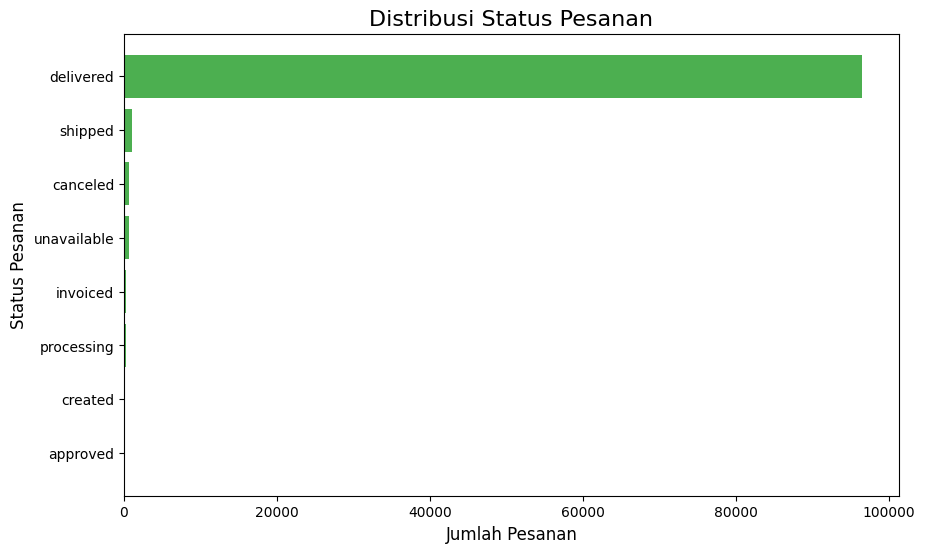

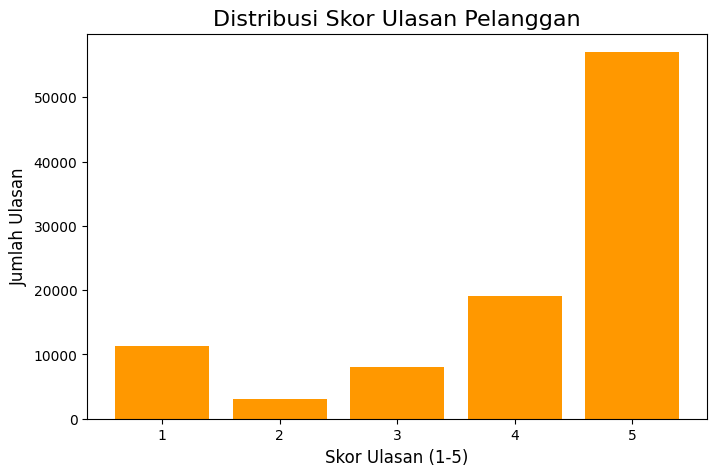

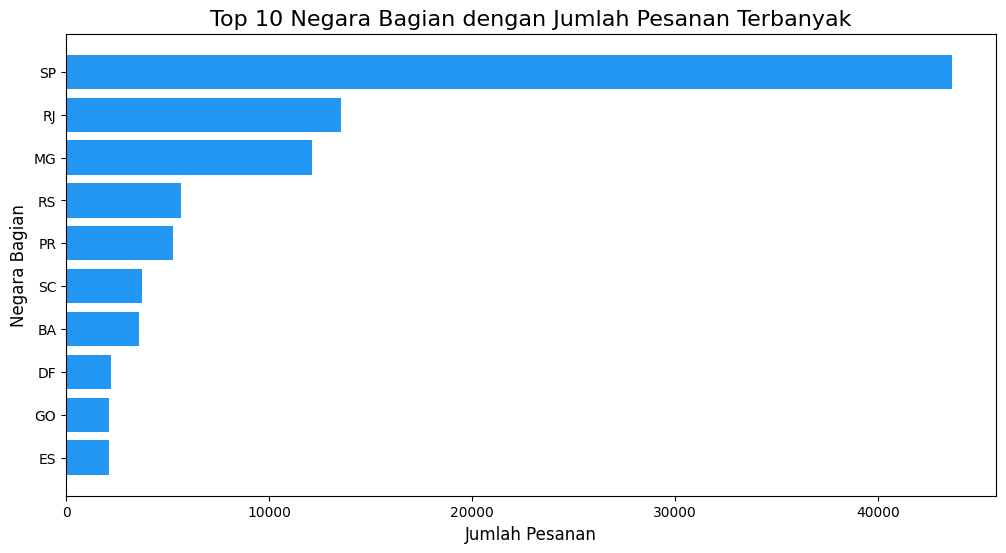

/tmp/ipython-input-850215513.py:151: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot,


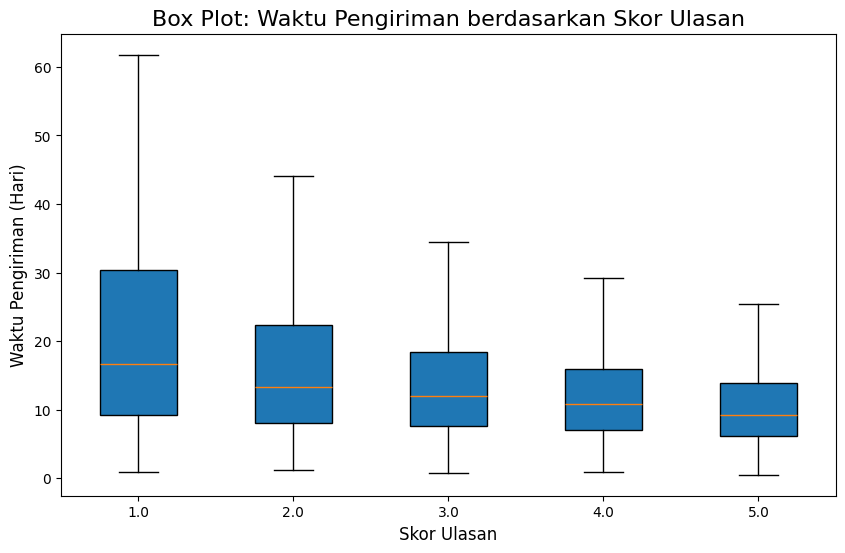

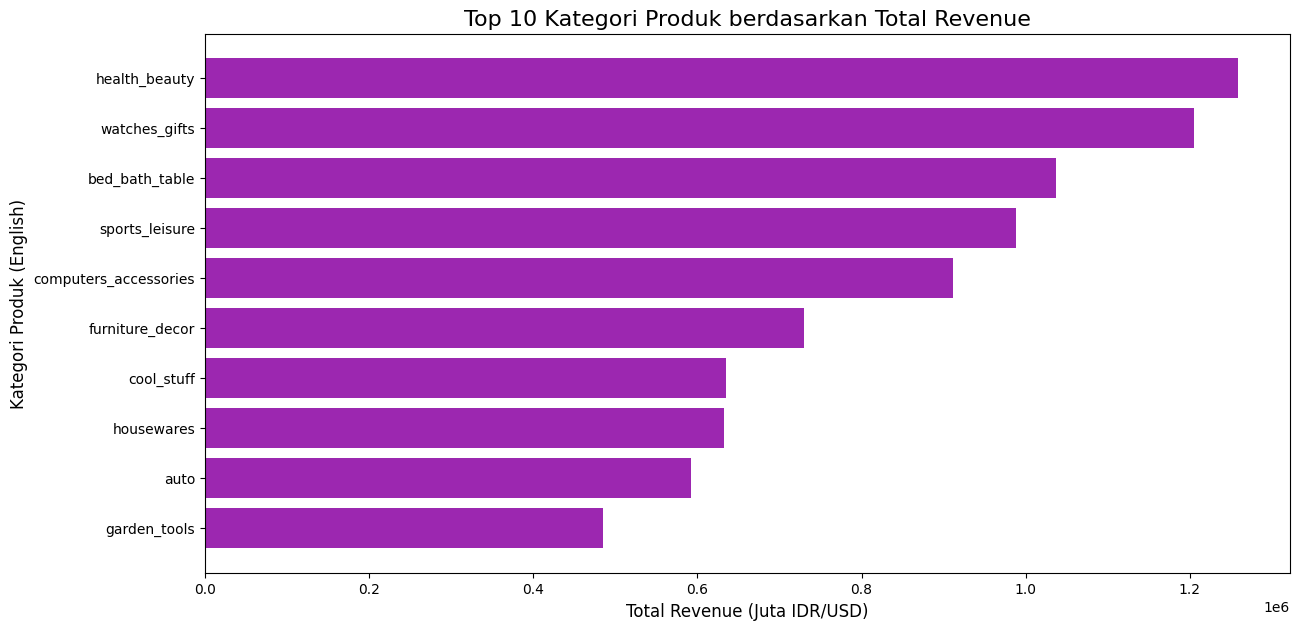

In [111]:
# ==============================================================================
# 1. SETUP LIBRARIES DAN LOAD DATA
# ==============================================================================

# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Atur opsi tampilan agar semua kolom ditampilkan (opsional)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Memuat semua dataset
print("Memuat Dataset...")
try:
    # Reload orders_df from the original source to ensure full dataset is used for EDA
    orders_df = pd.read_csv('E-commerce-public-dataset/orders_dataset.csv')
    customers_df = pd.read_csv('E-commerce-public-dataset/customers_dataset.csv')
    geolocation_df = pd.read_csv('E-commerce-public-dataset/geolocation_dataset.csv')
    order_items_df = pd.read_csv('E-commerce-public-dataset/order_items_dataset.csv')
    order_payments_df = pd.read_csv('E-commerce-public-dataset/order_payments_dataset.csv')
    order_reviews_df = pd.read_csv('E-commerce-public-dataset/order_reviews_dataset.csv')
    category_translation_df = pd.read_csv('E-commerce-public-dataset/product_category_name_translation.csv')
    products_df = pd.read_csv('E-commerce-public-dataset/products_dataset.csv')
    sellers_df = pd.read_csv('E-commerce-public-dataset/sellers_dataset.csv')
    print("Selesai Memuat. Total 9 DataFrames dimuat.")
except FileNotFoundError as e:
    print(f"ERROR: File tidak ditemukan: {e}. Pastikan semua file CSV berada di direktori yang sama.")


# ==============================================================================
# 2. INSPEKSI DATA AWAL (Data Quality Check)
# ==============================================================================

# Fungsi untuk inspeksi cepat DataFrame
def quick_eda(df, name):
    print(f"\n{'='*20} {name} {'='*20}")
    print(f"Shape (Baris, Kolom): {df.shape}")
    print("\n5 Baris Pertama:")
    print(df.head())
    print(f"\n{name} Info:")
    df.info(verbose=False) # Ringkas informasi untuk tampilan bersih
    print(f"\n{name} Missing Values (Jumlah):")
    # Hanya tampilkan kolom dengan missing value > 0
    missing_data = df.isnull().sum()
    print(missing_data[missing_data > 0].sort_values(ascending=False))
    print("=" * 60)

# Inspeksi pada beberapa DataFrame kunci
quick_eda(orders_df, "Orders DF")
quick_eda(customers_df, "Customers DF")
quick_eda(products_df, "Products DF")
quick_eda(order_reviews_df, "Order Reviews DF")


# ==============================================================================
# 3. DATA PREPROCESSING (Konversi Tipe Data & Penanganan Missing Values)
# ==============================================================================

# 3.1. Konversi Kolom Tanggal/Waktu
datetime_cols_orders = [col for col in orders_df.columns if 'date' in col or 'timestamp' in col]
for col in datetime_cols_orders:
    orders_df[col] = pd.to_datetime(orders_df[col], errors='coerce')

# 3.2. Penanganan Missing Values di order_reviews_df
# Ganti missing values (NaN) pada kolom komentar dengan string kosong
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna('')
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('')

print("\n[PREPROCESSING] Konversi tanggal selesai dan Missing Values komentar ulasan ditangani.")


# ==============================================================================
# 4. DATA MERGING (Menyatukan data untuk Analisis Lanjutan)
# ==============================================================================

# 4.1. Menggabungkan data utama: Orders, Customers, Payments, dan Reviews
df_merged = pd.merge(orders_df, customers_df, on='customer_id', how='left')
df_merged = pd.merge(df_merged, order_payments_df, on='order_id', how='left')
# Hanya ambil review score pertama jika ada duplikat order_id (misal, review_id berbeda)
order_reviews_clean = order_reviews_df.sort_values(by='review_creation_date').drop_duplicates(subset=['order_id'], keep='first')
df_merged = pd.merge(df_merged, order_reviews_clean[['order_id', 'review_score']], on='order_id', how='left')

# 4.2. Menggabungkan data untuk analisis produk
df_product_analysis = pd.merge(order_items_df, products_df, on='product_id', how='left')
df_product_analysis = pd.merge(df_product_analysis, category_translation_df, on='product_category_name', how='left')

# KOREKSI PENTING: Penanganan Missing English Category Names
# Mengisi nilai NaN pada kategori bahasa Inggris dengan placeholder 'no_translation'
# sebelum dilakukan groupby untuk menghindari error
df_product_analysis['product_category_name_english'] = df_product_analysis['product_category_name_english'].fillna('no_translation')

print("\n[MERGING] DataFrame gabungan (df_merged dan df_product_analysis) siap untuk analisis.")
quick_eda(df_merged, "Merged DF")


# ==============================================================================
# 5. ANALISIS EKSPLORASI UTAMA DENGAN MATPLOTLIB
# ==============================================================================

print("\n{'='*20} Hasil Visualisasi EDA {'='*20}")

### 5.1. Analisis Status Pesanan (Univariate - Kategorikal)
order_status_counts = orders_df['order_status'].value_counts()

plt.figure(figsize=(10, 6))
plt.barh(order_status_counts.index, order_status_counts.values, color='#4CAF50')
plt.title('Distribusi Status Pesanan', fontsize=16)
plt.xlabel('Jumlah Pesanan', fontsize=12)
plt.ylabel('Status Pesanan', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

# ---
### 5.2. Analisis Nilai Ulasan Pelanggan (Univariate - Numerik/Ordinal)
review_scores = order_reviews_clean['review_score'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(review_scores.index.astype(str), review_scores.values, color='#FF9800')
plt.title('Distribusi Skor Ulasan Pelanggan', fontsize=16)
plt.xlabel('Skor Ulasan (1-5)', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)
plt.show()

# ---
### 5.3. Analisis Geografis: Pelanggan Terbanyak (Bivariate)
top_10_states = df_merged['customer_state'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
plt.barh(top_10_states.index, top_10_states.values, color='#2196F3')
plt.title('Top 10 Negara Bagian dengan Jumlah Pesanan Terbanyak', fontsize=16)
plt.xlabel('Jumlah Pesanan', fontsize=12)
plt.ylabel('Negara Bagian', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

# ---
### 5.4. Analisis Kinerja: Hubungan Review Score dengan Waktu Pengiriman (Bivariate)
# Hitung Waktu Pengiriman (dalam hari)
df_merged['delivery_time_days'] = (df_merged['order_delivered_customer_date'] - df_merged['order_purchase_timestamp']).dt.total_seconds() / (60*60*24)
df_delivery = df_merged.dropna(subset=['delivery_time_days', 'review_score']).copy()

# Persiapkan data untuk Box Plot
# Hanya ambil data dengan waktu pengiriman yang wajar (misalnya, di bawah 100 hari)
df_delivery_filtered = df_delivery[df_delivery['delivery_time_days'] < 100]
data_to_plot = [df_delivery_filtered[df_delivery_filtered['review_score']==score]['delivery_time_days'].values
                for score in sorted(df_delivery_filtered['review_score'].unique())]

plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot,
            labels=sorted(df_delivery_filtered['review_score'].unique()),
            vert=True,
            showfliers=False, # Tidak menampilkan outlier ekstrem untuk kejelasan visual
            patch_artist=True)

plt.title('Box Plot: Waktu Pengiriman berdasarkan Skor Ulasan', fontsize=16)
plt.xlabel('Skor Ulasan', fontsize=12)
plt.ylabel('Waktu Pengiriman (Hari)', fontsize=12)
plt.show()





# ---
### 5.5. Analisis Produk Terlaris (Multivariate - Revenue per Kategori)
# Hitung Total Revenue per Kategori Produk
category_sales = df_product_analysis.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).nlargest(10)

plt.figure(figsize=(14, 7))
# Membuat bar plot horizontal
plt.barh(category_sales.index, category_sales.values, color='#9C27B0')
plt.title('Top 10 Kategori Produk berdasarkan Total Revenue', fontsize=16)
plt.xlabel('Total Revenue (Juta IDR/USD)', fontsize=12)
plt.ylabel('Kategori Produk (English)', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
#Memuat dataset yang diperlukan
df_orders = pd.read_csv('E-commerce-public-dataset/orders_dataset.csv')
df_payments = pd.read_csv('E-commerce-public-dataset/order_payments_dataset.csv')
df_customers = pd.read_csv('E-commerce-public-dataset/customers_dataset.csv')

#Gabungkan data pesanan dan pembayaran untuk mendapatkan total nilai pesanan (order value)
order_value = df_payments.groupby('order_id')['payment_value'].sum().reset_index()
order_value.rename(columns={'payment_value': 'order_value'}, inplace=True)

#Gabungkan data pesanan dan pelanggan untuk mendapatkan lokasi
df_merged = df_orders.merge(df_customers[['customer_id', 'customer_state', 'customer_city']],
                            on='customer_id', how='left')

#Gabungkan dengan nilai pesanan
df_final = df_merged.merge(order_value, on='order_id', how='left')

#Mengisi nilai order_value yang hilang dengan 0, jika ada pesanan tanpa data pembayaran
df_final['order_value'] = df_final['order_value'].fillna(0)

print("Data berhasil digabungkan dan siap dianalisis.")

Data berhasil digabungkan dan siap dianalisis.


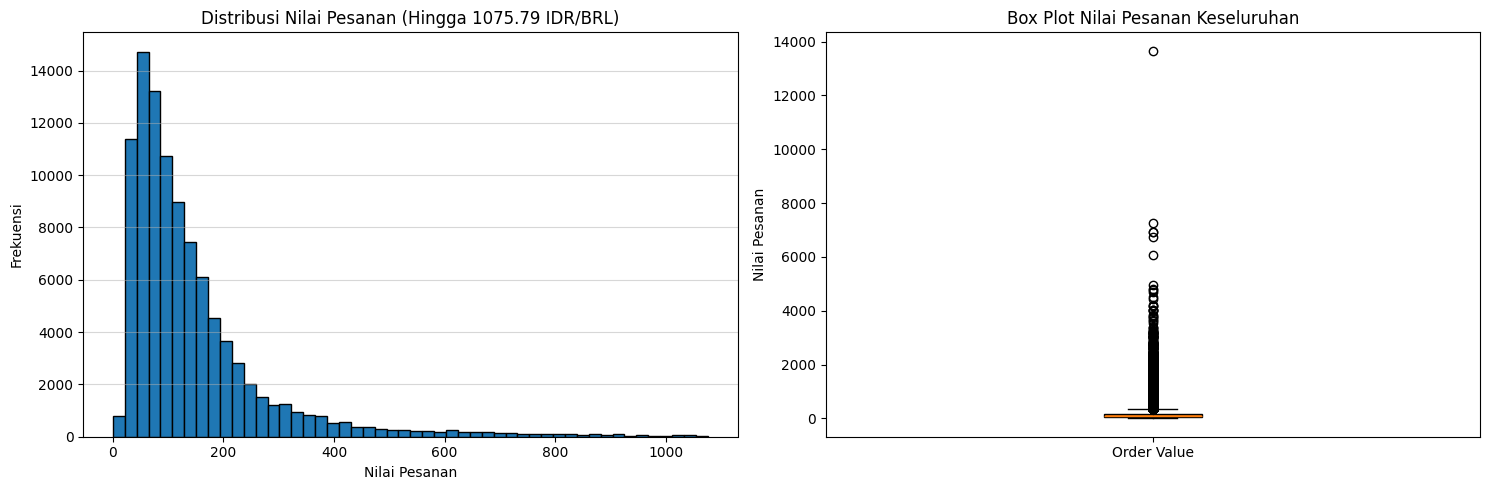


Rata-rata Nilai Pesanan: 160.99
Median Nilai Pesanan: 105.29


In [116]:
#Distribusi Nilai Pesanan

#Kita akan fokus pada pesanan yang nilainya di bawah persentil ke-99
max_value_for_plot = df_final['order_value'].quantile(0.99)
df_plot = df_final[df_final['order_value'] <= max_value_for_plot]

plt.figure(figsize=(15, 5))

#Subplot 1: Histogram untuk distribusi
plt.subplot(1, 2, 1)
plt.hist(df_plot['order_value'], bins=50, color='#1f77b4', edgecolor='black') # Menggunakan plt.hist
plt.title(f'Distribusi Nilai Pesanan (Hingga {max_value_for_plot:.2f} IDR/BRL)')
plt.xlabel('Nilai Pesanan')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.5)

#Subplot 2: Box Plot untuk melihat median dan kuartil
plt.subplot(1, 2, 2)
plt.boxplot(df_final['order_value'], vert=True, patch_artist=True, boxprops=dict(facecolor='#ff7f0e')) # Menggunakan plt.boxplot
plt.title('Box Plot Nilai Pesanan Keseluruhan')
plt.ylabel('Nilai Pesanan')
plt.xticks([1], ['Order Value']) # Menetapkan label x untuk box plot

plt.tight_layout()
plt.show()

print("\nRata-rata Nilai Pesanan:", round(df_final['order_value'].mean(), 2))
print("Median Nilai Pesanan:", round(df_final['order_value'].median(), 2))

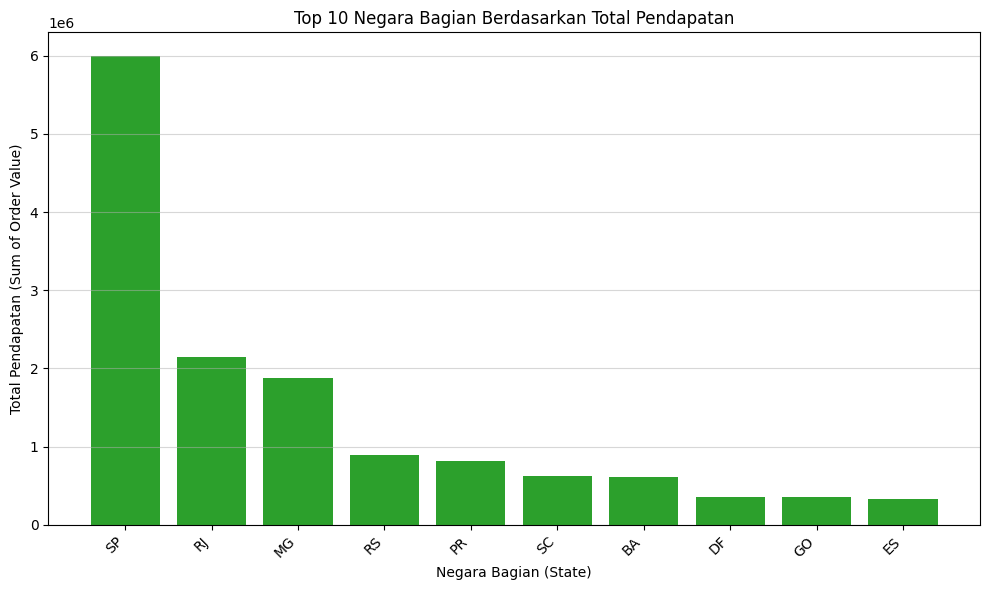

In [117]:
#Top 10 Negara Bagian Berdasarkan Pendapatan

#Hitung total pendapatan per negara bagian
state_revenue = df_final.groupby('customer_state')['order_value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
#embuat bar chart
plt.bar(state_revenue.index, state_revenue.values, color='#2ca02c') # Menggunakan plt.bar
plt.title('Top 10 Negara Bagian Berdasarkan Total Pendapatan')
plt.xlabel('Negara Bagian (State)')
plt.ylabel('Total Pendapatan (Sum of Order Value)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

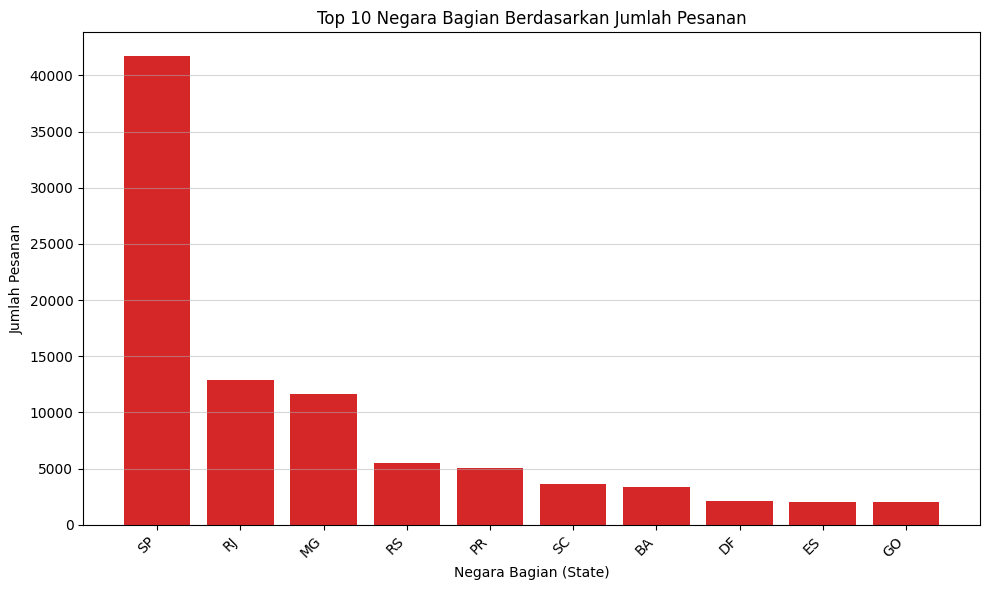

In [118]:
#Top 10 Negara Bagian Berdasarkan Jumlah Pesanan

#Hitung jumlah pesanan per negara bagian
state_order_count = df_final['customer_state'].value_counts().head(10)

plt.figure(figsize=(10, 6))
#Membuat bar chart
plt.bar(state_order_count.index, state_order_count.values, color='#d62728') # Menggunakan plt.bar
plt.title('Top 10 Negara Bagian Berdasarkan Jumlah Pesanan')
plt.xlabel('Negara Bagian (State)')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

### Pertanyaan 2:

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [122]:
#Memuat dataset yang diperlukan
df_orders = pd.read_csv('E-commerce-public-dataset/orders_dataset.csv')
df_sellers = pd.read_csv('E-commerce-public-dataset/sellers_dataset.csv')
df_customers = pd.read_csv('E-commerce-public-dataset/customers_dataset.csv')
df_order_items = pd.read_csv('E-commerce-public-dataset/order_items_dataset.csv')

#Gabungkan Orders dan Items untuk mendapatkan ID Penjual
df_temp = df_orders.merge(df_order_items[['order_id', 'seller_id']], on='order_id', how='left')

#Gabungkan dengan Customers dan Sellers untuk mendapatkan lokasi
df_temp = df_temp.merge(df_customers[['customer_id', 'customer_state']], on='customer_id', how='left')
df_final = df_temp.merge(df_sellers[['seller_id', 'seller_state']], on='seller_id', how='left')

#Perhitungan Waktu Pengiriman (Delivery Time)
date_cols = ['order_purchase_timestamp', 'order_delivered_customer_date']
for col in date_cols:
    df_final[col] = pd.to_datetime(df_final[col])

#Hitung waktu pengiriman (dalam hari)
df_delivered = df_final[df_final['order_status'] == 'delivered'].copy()
df_delivered['delivery_time_days'] = (df_delivered['order_delivered_customer_date'] - df_delivered['order_purchase_timestamp']).dt.total_seconds() / (60*60*24)

#Buang nilai NaN pada kolom waktu pengiriman yang mungkin terjadi
df_delivered.dropna(subset=['delivery_time_days'], inplace=True)

#Tampilkan rata-rata waktu pengiriman
avg_delivery_time = df_delivered['delivery_time_days'].mean().round(2)
print(f"Rata-rata Waktu Pengiriman: {avg_delivery_time} hari.")

Rata-rata Waktu Pengiriman: 12.47 hari.


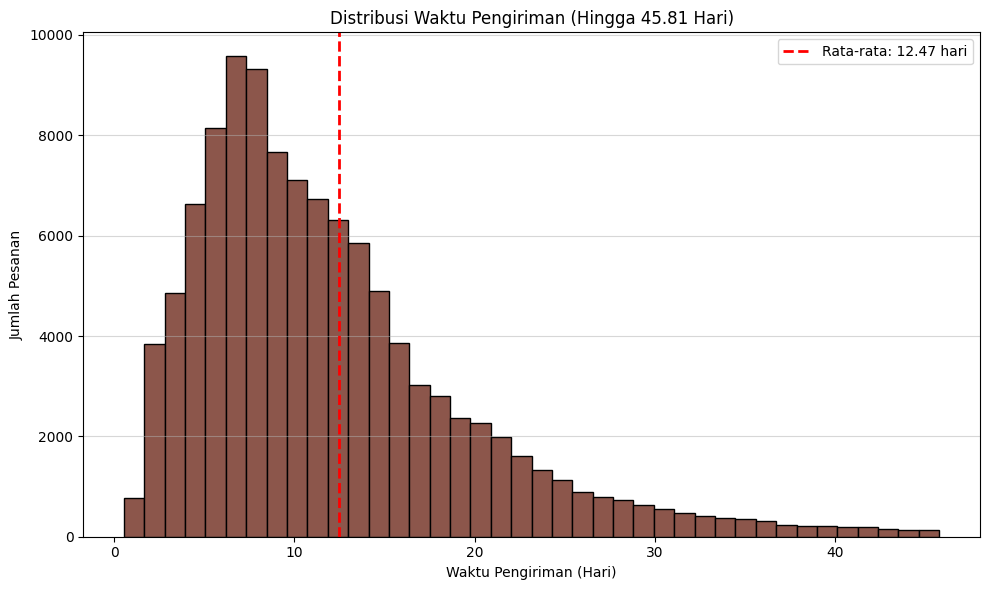

In [123]:
#Distribusi Waktu Pengiriman

#Batasi visualisasi di bawah persentil ke-99 agar grafik lebih mudah dibaca
max_time_for_plot = df_delivered['delivery_time_days'].quantile(0.99)
df_plot_time = df_delivered[df_delivered['delivery_time_days'] <= max_time_for_plot]

plt.figure(figsize=(10, 6))

#Membuat Histogram
plt.hist(df_plot_time['delivery_time_days'], bins=40, color='#8c564b', edgecolor='black')
plt.axvline(avg_delivery_time, color='red', linestyle='dashed', linewidth=2, label=f'Rata-rata: {avg_delivery_time:.2f} hari')
plt.title(f'Distribusi Waktu Pengiriman (Hingga {max_time_for_plot:.2f} Hari)')
plt.xlabel('Waktu Pengiriman (Hari)')
plt.ylabel('Jumlah Pesanan')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

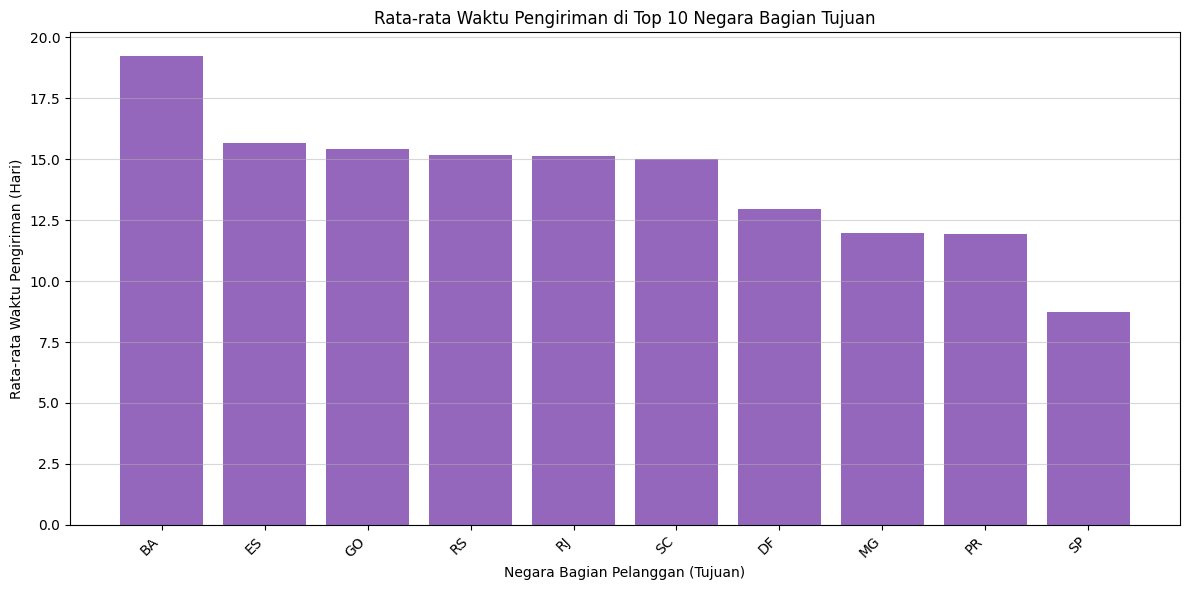

In [124]:
#Waktu Pengiriman Berdasarkan Negara Bagian Tujuan

#Hitung 10 negara bagian pelanggan dengan jumlah pesanan terbanyak
top_10_states = df_delivered['customer_state'].value_counts().head(10).index

#Filter data untuk negara bagian tersebut
df_top_states = df_delivered[df_delivered['customer_state'].isin(top_10_states)]

#Hitung rata-rata waktu pengiriman per negara bagian tujuan
state_avg_delivery = df_top_states.groupby('customer_state')['delivery_time_days'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))

#Membuat Bar Plot
plt.bar(state_avg_delivery.index, state_avg_delivery.values, color='#9467bd')
plt.title('Rata-rata Waktu Pengiriman di Top 10 Negara Bagian Tujuan')
plt.xlabel('Negara Bagian Pelanggan (Tujuan)')
plt.ylabel('Rata-rata Waktu Pengiriman (Hari)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

### Pertanyaan 3:

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [127]:
#Memuat dataset yang diperlukan
df_orders = pd.read_csv('E-commerce-public-dataset/orders_dataset.csv')
df_reviews = pd.read_csv('E-commerce-public-dataset/order_reviews_dataset.csv')

#Gabungkan data pesanan dan ulasan
df_merged = df_orders.merge(df_reviews[['order_id', 'review_score']], on='order_id', how='inner')

#Konversi dan Klasifikasi Waktu Pengiriman
date_cols = ['order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_cols:
    df_merged[col] = pd.to_datetime(df_merged[col])

#Fokus hanya pada pesanan yang sudah berstatus 'delivered'
df_delivered = df_merged[df_merged['order_status'] == 'delivered'].copy()
df_delivered.dropna(subset=date_cols, inplace=True)

#Klasifikasi Keterlambatan:
#Tepat Waktu (On Time) sebaliknya
df_delivered['delivery_status'] = np.where(
    df_delivered['order_delivered_customer_date'] > df_delivered['order_estimated_delivery_date'],
    'Late',
    'On Time'
)

print("Data siap untuk analisis ulasan dan status pengiriman.")

Data siap untuk analisis ulasan dan status pengiriman.


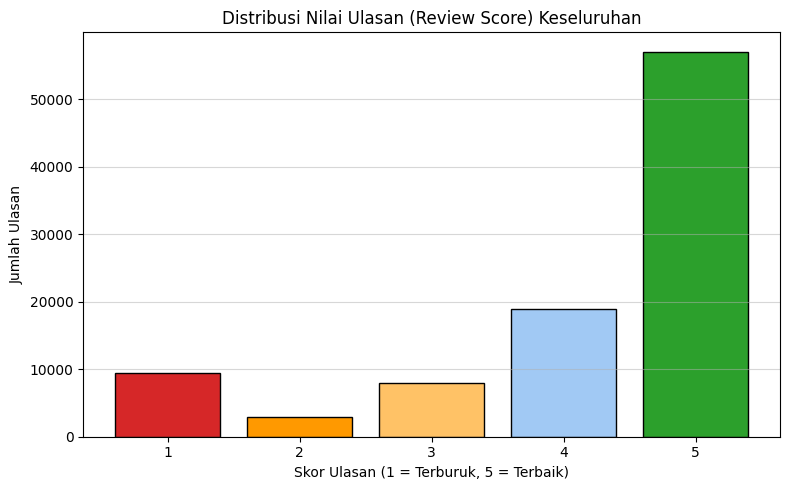

In [128]:
#Distribusi Nilai Ulasan (Review Score) Keseluruhan

#Hitung jumlah (count) untuk setiap skor ulasan
review_counts = df_delivered['review_score'].value_counts().sort_index()

plt.figure(figsize=(8, 5))

#Membuat Bar Plot
plt.bar(review_counts.index.astype(str), review_counts.values, color=['#d62728', '#ff9900', '#ffc266', '#a1c9f4', '#2ca02c'], edgecolor='black')
plt.title('Distribusi Nilai Ulasan (Review Score) Keseluruhan')
plt.xlabel('Skor Ulasan (1 = Terburuk, 5 = Terbaik)')
plt.ylabel('Jumlah Ulasan')
plt.xticks(review_counts.index.astype(str)) # Memastikan label x adalah 1, 2, 3, 4, 5
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

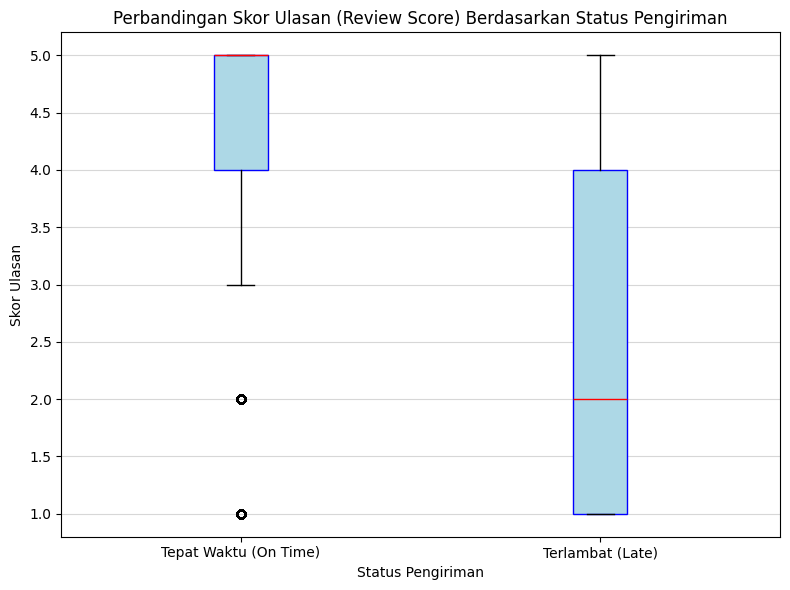


Rata-rata Skor Ulasan:
- Tepat Waktu (On Time): 4.294
- Terlambat (Late): 2.566
Perbedaan rata-rata: 1.728


In [129]:
#Perbedaan Skor Ulasan Berdasarkan Status Pengiriman

#Siapkan data untuk box plot: dua list skor berdasarkan status pengiriman
on_time_scores = df_delivered[df_delivered['delivery_status'] == 'On Time']['review_score']
late_scores = df_delivered[df_delivered['delivery_status'] == 'Late']['review_score']

data_to_plot = [on_time_scores, late_scores]
labels = ['Tepat Waktu (On Time)', 'Terlambat (Late)']

plt.figure(figsize=(8, 6))

#Membuat Box Plot
plt.boxplot(data_to_plot, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))
plt.title('Perbandingan Skor Ulasan (Review Score) Berdasarkan Status Pengiriman')
plt.xlabel('Status Pengiriman')
plt.ylabel('Skor Ulasan')
plt.xticks(ticks=[1, 2], labels=labels)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

#Menampilkan rata-rata skor sebagai data pendukung
avg_on_time = on_time_scores.mean().round(3)
avg_late = late_scores.mean().round(3)

print(f"\nRata-rata Skor Ulasan:")
print(f"- Tepat Waktu (On Time): {avg_on_time}")
print(f"- Terlambat (Late): {avg_late}")
print(f"Perbedaan rata-rata: {(avg_on_time - avg_late).round(3)}")

### Pertanyaan 4:

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
#Memuat dataset yang diperlukan
df_orders = pd.read_csv('E-commerce-public-dataset/orders_dataset.csv')
df_reviews = pd.read_csv('E-commerce-public-dataset/order_reviews_dataset.csv')
df_order_items = pd.read_csv('E-commerce-public-dataset/order_items_dataset.csv')
df_products = pd.read_csv('E-commerce-public-dataset/products_dataset.csv')
df_translation = pd.read_csv('E-commerce-public-dataset/product_category_name_translation.csv')

#1.Gabungkan Ulasan dan Item untuk mendapatkan product_id
df_temp = df_reviews.merge(df_order_items[['order_id', 'product_id']], on='order_id', how='left')

#2.Gabungkan dengan Produk untuk mendapatkan kategori
df_temp = df_temp.merge(df_products[['product_id', 'product_category_name']], on='product_id', how='left')

#3.Gabungkan dengan Terjemahan untuk nama kategori dalam bahasa Inggris
df_final = df_temp.merge(df_translation, on='product_category_name', how='left')

#Gunakan nama kategori yang sudah diterjemahkan atau yang asli jika tidak ada terjemahan
df_final['category_name_en'] = df_final['product_category_name_english'].fillna(df_final['product_category_name'])

#Hapus baris yang tidak memiliki ulasan atau kategori yang jelas
df_final.dropna(subset=['review_score', 'category_name_en'], inplace=True)

print("Data berhasil digabungkan dan siap untuk dianalisis kategori.")

Data berhasil digabungkan dan siap untuk dianalisis kategori.


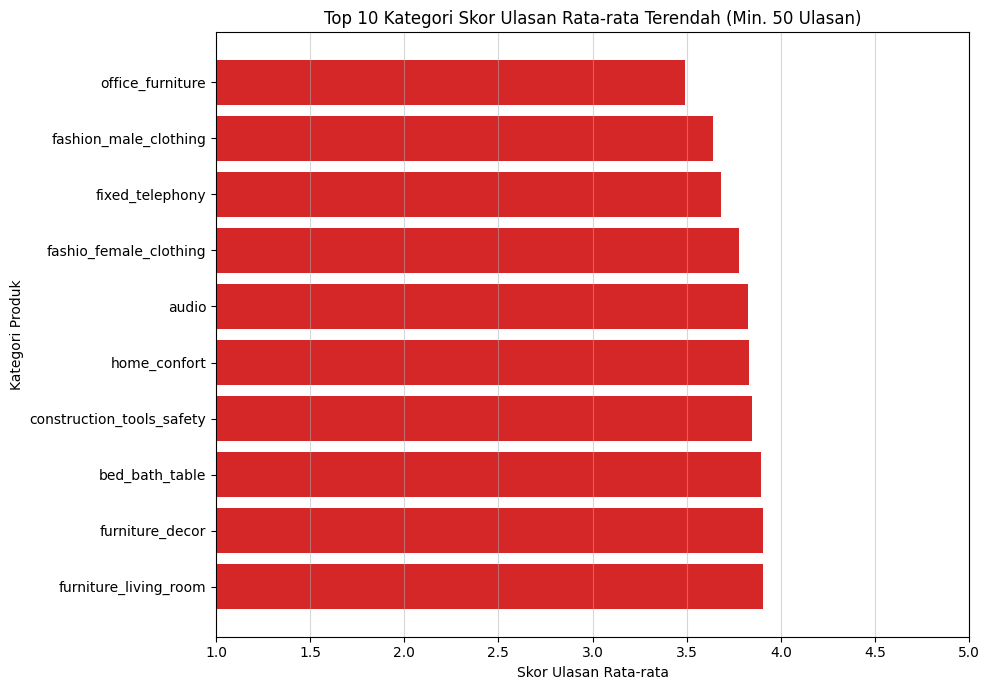


Kategori dengan Skor Rata-rata Terendah:
category_name_en
office_furniture             3.493183
fashion_male_clothing        3.641221
fixed_telephony              3.683206
fashio_female_clothing       3.780000
audio                        3.825485
home_confort                 3.829885
construction_tools_safety    3.844560
bed_bath_table               3.895663
furniture_decor              3.903493
furniture_living_room        3.904382
Name: review_score, dtype: float64


In [133]:
#Top 10 Kategori Skor Ulasan Terendah

#Hitung rata-rata skor ulasan per kategori
category_avg_score = df_final.groupby('category_name_en')['review_score'].mean()

#Filter kategori yang memiliki minimal N ulasan (untuk menghindari bias dari kategori dengan sedikit data)
MIN_REVIEWS = 50 # Anda dapat menyesuaikan nilai minimum ini
valid_categories = df_final['category_name_en'].value_counts()
valid_categories = valid_categories[valid_categories >= MIN_REVIEWS].index
category_avg_score = category_avg_score[category_avg_score.index.isin(valid_categories)]

#Ambil 10 kategori dengan skor rata-rata terendah
top_10_worst_score = category_avg_score.sort_values(ascending=True).head(10)

plt.figure(figsize=(10, 7))

#Membuat Bar Plot Horizontal
plt.barh(top_10_worst_score.index, top_10_worst_score.values, color='#d62728')
plt.title(f'Top 10 Kategori Skor Ulasan Rata-rata Terendah (Min. {MIN_REVIEWS} Ulasan)')
plt.xlabel('Skor Ulasan Rata-rata')
plt.ylabel('Kategori Produk')
plt.xlim(1, 5) # Batas skor dari 1 hingga 5
plt.gca().invert_yaxis() # Membalik urutan agar yang terburuk ada di atas
plt.grid(axis='x', alpha=0.5)
plt.tight_layout()
plt.show()

print(f"\nKategori dengan Skor Rata-rata Terendah:")
print(top_10_worst_score)

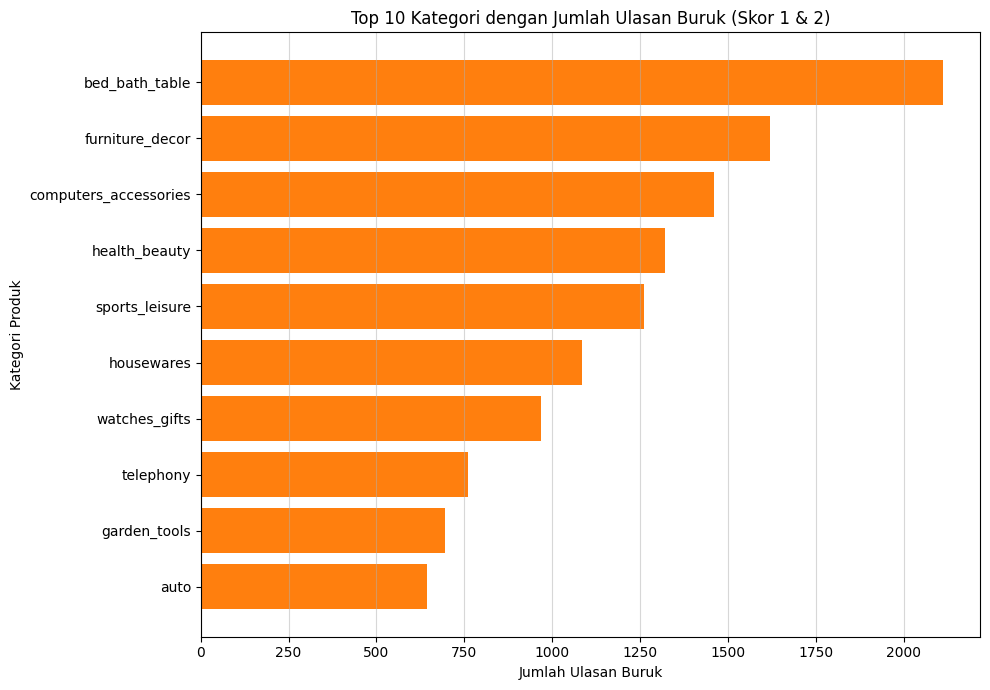


Kategori dengan Jumlah Keluhan Terbanyak (Skor 1 & 2):
category_name_en
bed_bath_table           2112
furniture_decor          1621
computers_accessories    1461
health_beauty            1321
sports_leisure           1260
housewares               1086
watches_gifts             967
telephony                 761
garden_tools              696
auto                      643
Name: count, dtype: int64


In [134]:
#Keluhan Ulasan (Skor 1 & 2) Berdasarkan Kategori

#Filter data hanya untuk ulasan buruk (skor 1 dan 2)
df_bad_reviews = df_final[df_final['review_score'].isin([1, 2])].copy()

#Hitung jumlah ulasan buruk per kategori
bad_review_counts = df_bad_reviews['category_name_en'].value_counts()

#Filter hanya kategori yang valid (sudah ditetapkan pada langkah sebelumnya)
bad_review_counts = bad_review_counts[bad_review_counts.index.isin(valid_categories)]

#Ambil 10 kategori yang paling sering mendapat ulasan buruk
top_10_complaints = bad_review_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 7))

#Membuat Bar Plot Horizontal
plt.barh(top_10_complaints.index, top_10_complaints.values, color='#ff7f0e')
plt.title('Top 10 Kategori dengan Jumlah Ulasan Buruk (Skor 1 & 2)')
plt.xlabel('Jumlah Ulasan Buruk')
plt.ylabel('Kategori Produk')
plt.gca().invert_yaxis() # Membalik urutan agar yang teratas adalah yang paling banyak keluhan
plt.grid(axis='x', alpha=0.5)
plt.tight_layout()
plt.show()

print(f"\nKategori dengan Jumlah Keluhan Terbanyak (Skor 1 & 2):")
print(top_10_complaints)

### Pertanyaan 5:

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
#Memuat dataset yang diperlukan
df_order_items = pd.read_csv('E-commerce-public-dataset/order_items_dataset.csv')
df_products = pd.read_csv('E-commerce-public-dataset/products_dataset.csv')
df_payments = pd.read_csv('E-commerce-public-dataset/order_payments_dataset.csv')
df_translation = pd.read_csv('E-commerce-public-dataset/product_category_name_translation.csv')

#1.Hitung Total Pendapatan per Order
order_revenue = df_payments.groupby('order_id')['payment_value'].sum().reset_index()
order_revenue.rename(columns={'payment_value': 'order_revenue'}, inplace=True)

#2.Gabungkan data
df_temp = df_order_items.merge(df_products, on='product_id', how='left')

#Gabungkan dengan revenue (melalui order_id)
df_category_revenue = df_temp.groupby(['order_id', 'product_category_name']).agg(
    item_count=('product_id', 'count')
).reset_index()

df_category_revenue = df_category_revenue.merge(order_revenue, on='order_id', how='left')

#3.Terjemahkan Kategori
df_category_revenue = df_category_revenue.merge(df_translation, on='product_category_name', how='left')
df_category_revenue['category_name_en'] = df_category_revenue['product_category_name_english'].fillna(df_category_revenue['product_category_name'])
df_category_revenue.dropna(subset=['category_name_en'], inplace=True)

print("Data siap untuk analisis performa kategori.")

Data siap untuk analisis performa kategori.


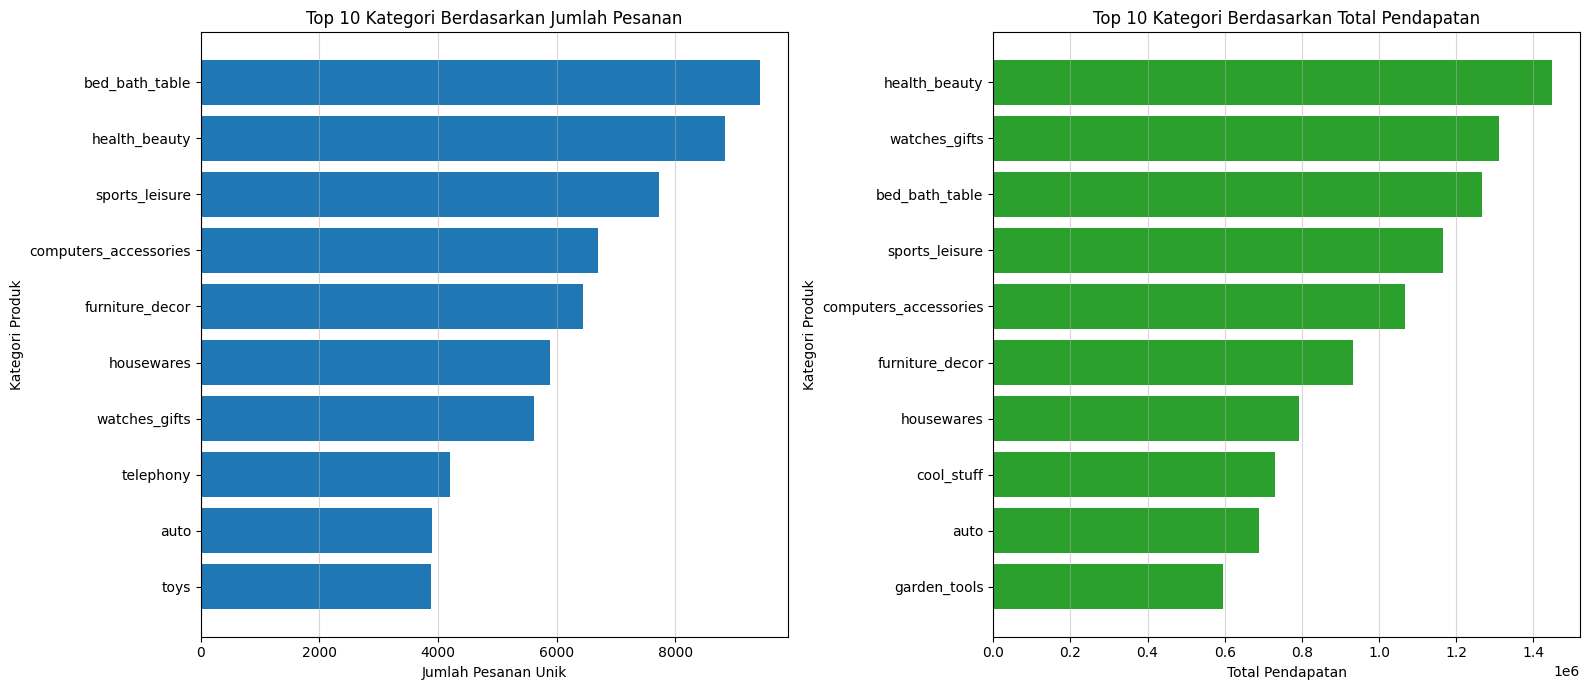

In [138]:
#Perbandingan Popularitas (Jumlah Pesanan) dan Pendapatan

#A. Hitung Jumlah Pesanan Unik per Kategori (Popularitas)
#Gunakan df_category_revenue, hitung jumlah order_id unik
category_order_count = df_category_revenue.groupby('category_name_en')['order_id'].nunique().sort_values(ascending=False).head(10)

#B. Hitung Total Pendapatan per Kategori (Revenue)
#Gunakan df_category_revenue, jumlahkan order_revenue
category_total_revenue = df_category_revenue.groupby('category_name_en')['order_revenue'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(16, 7))

#Subplot 1: Popularitas (Jumlah Pesanan)
plt.subplot(1, 2, 1)
plt.barh(category_order_count.index, category_order_count.values, color='#1f77b4')
plt.title('Top 10 Kategori Berdasarkan Jumlah Pesanan')
plt.xlabel('Jumlah Pesanan Unik')
plt.ylabel('Kategori Produk')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.5)

#Subplot 2: Pendapatan Tertinggi
plt.subplot(1, 2, 2)
plt.barh(category_total_revenue.index, category_total_revenue.values, color='#2ca02c')
plt.title('Top 10 Kategori Berdasarkan Total Pendapatan')
plt.xlabel('Total Pendapatan')
plt.ylabel('Kategori Produk')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.5)

plt.tight_layout()
plt.show()

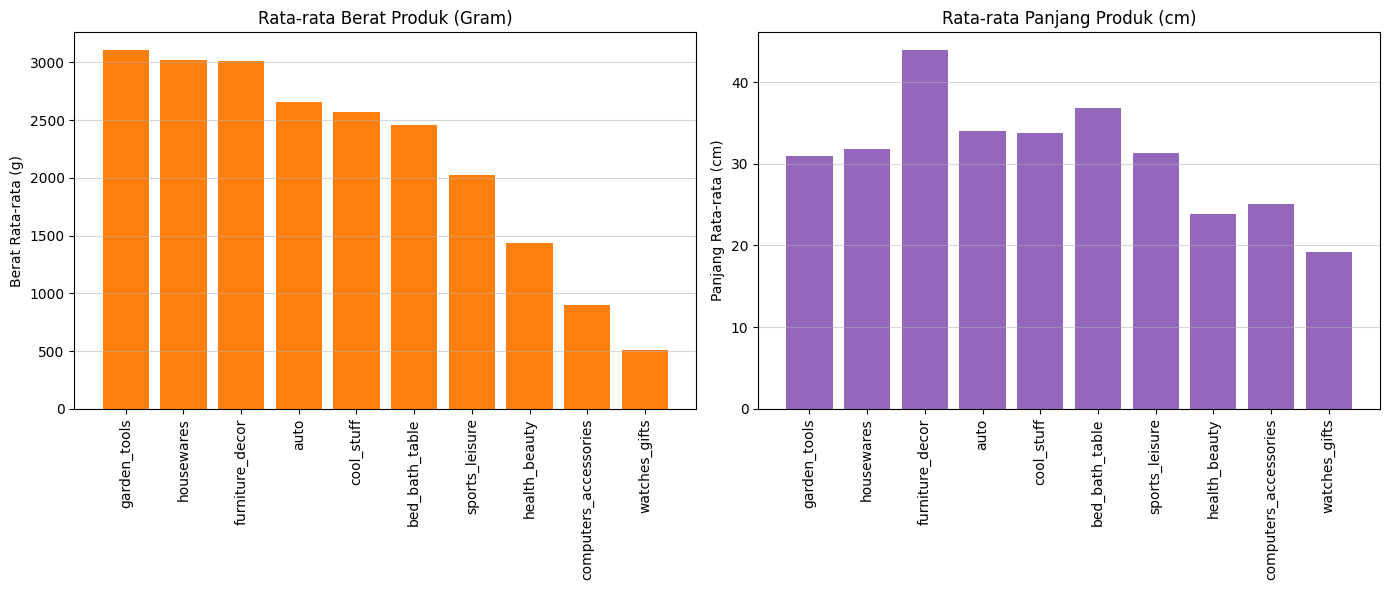

In [139]:
#Karakteristik Fisik Kategori Pendapatan Tertinggi

#Ambil kategori teratas dari daftar pendapatan
top_revenue_categories = category_total_revenue.index

#Gabungkan lagi produk dengan kategorinya
df_product_details = df_products.merge(df_translation, on='product_category_name', how='left')
df_product_details['category_name_en'] = df_product_details['product_category_name_english'].fillna(df_product_details['product_category_name'])

#Filter data produk hanya untuk kategori top revenue
df_top_products = df_product_details[df_product_details['category_name_en'].isin(top_revenue_categories)]

#Hitung rata-rata dimensi dan berat (ambil kolom product_weight_g sebagai contoh)
category_physical_avg = df_top_products.groupby('category_name_en').agg(
    avg_weight_g=('product_weight_g', 'mean'),
    avg_length_cm=('product_length_cm', 'mean')
).sort_values(by='avg_weight_g', ascending=False)


plt.figure(figsize=(14, 6))

#Subplot 1: Rata-rata Berat (Grams)
plt.subplot(1, 2, 1)
plt.bar(category_physical_avg.index, category_physical_avg['avg_weight_g'], color='#ff7f0e')
plt.title('Rata-rata Berat Produk (Gram)')
plt.ylabel('Berat Rata-rata (g)')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.5)

#Subplot 2: Rata-rata Panjang (Centimeter)
plt.subplot(1, 2, 2)
plt.bar(category_physical_avg.index, category_physical_avg['avg_length_cm'], color='#9467bd')
plt.title('Rata-rata Panjang Produk (cm)')
plt.ylabel('Panjang Rata-rata (cm)')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()

### Pertanyaan 6:

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [142]:
#Memuat dataset yang diperlukan
df_order_items = pd.read_csv('E-commerce-public-dataset/order_items_dataset.csv')
df_reviews = pd.read_csv('E-commerce-public-dataset/order_reviews_dataset.csv')
df_orders = pd.read_csv('E-commerce-public-dataset/orders_dataset.csv') # Diperlukan untuk memastikan order_id unik

#1.Gabungkan item dengan ulasan untuk mendapatkan skor
df_temp = df_order_items.merge(df_reviews[['order_id', 'review_score']], on='order_id', how='left')

#2.Hitung performa setiap penjual
seller_performance = df_temp.groupby('seller_id').agg(
    # Hitung jumlah order unik yang dilayani (untuk popularitas)
    total_orders=('order_id', 'nunique'),
    # Hitung rata-rata skor ulasan
    avg_review_score=('review_score', 'mean'),
    # Hitung jumlah ulasan yang diterima (untuk filter)
    total_reviews=('review_score', 'count')
).reset_index()

#Filter penjual yang memiliki minimal 10 ulasan untuk analisis skor rata-rata yang lebih andal
MIN_REVIEWS = 10
df_performance = seller_performance[seller_performance['total_reviews'] >= MIN_REVIEWS].copy()

print(f"Data performa penjual berhasil diagregasi. Total penjual yang memenuhi syarat (min. {MIN_REVIEWS} ulasan): {len(df_performance)}")

Data performa penjual berhasil diagregasi. Total penjual yang memenuhi syarat (min. 10 ulasan): 1379


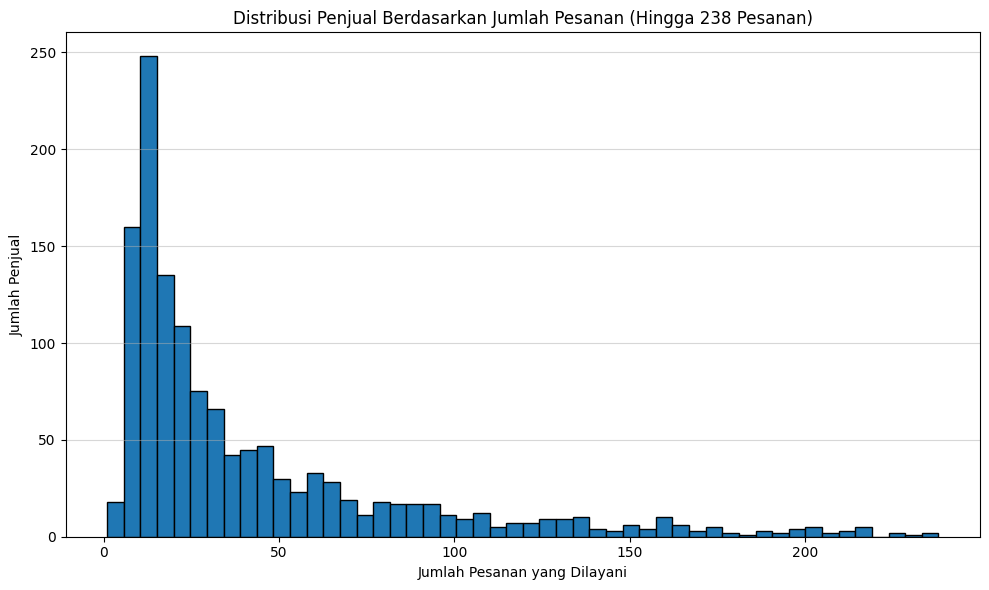


Rata-rata pesanan per penjual: 68.68
Median pesanan per penjual: 26.0


In [143]:
#Distribusi Penjual Berdasarkan Jumlah Pesanan

#Batasi visualisasi (misalnya, hingga persentil ke-95) agar histogram lebih mudah dibaca
max_orders_for_plot = df_performance['total_orders'].quantile(0.95)
df_plot_orders = df_performance[df_performance['total_orders'] <= max_orders_for_plot]

plt.figure(figsize=(10, 6))

#Membuat Histogram
plt.hist(df_plot_orders['total_orders'], bins=50, color='#1f77b4', edgecolor='black')
plt.title(f'Distribusi Penjual Berdasarkan Jumlah Pesanan (Hingga {int(max_orders_for_plot)} Pesanan)')
plt.xlabel('Jumlah Pesanan yang Dilayani')
plt.ylabel('Jumlah Penjual')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

print(f"\nRata-rata pesanan per penjual: {df_performance['total_orders'].mean().round(2)}")
print(f"Median pesanan per penjual: {df_performance['total_orders'].median()}")

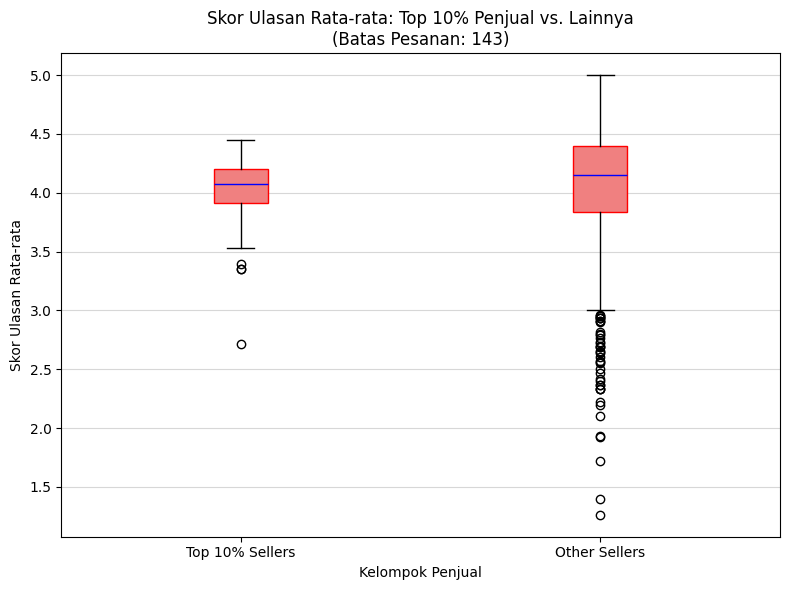


Rata-rata Skor Ulasan:
- Top 10% Sellers: 4.046
- Other Sellers: 4.071
Perbedaan rata-rata: -0.025


In [144]:
#Perbandingan Skor Ulasan: Top 10% Penjual VS Sisanya

#1.Tentukan batas untuk Top 10% berdasarkan total_orders
threshold = df_performance['total_orders'].quantile(0.90)

#2.Klasifikasikan penjual
df_performance['seller_group'] = np.where(
    df_performance['total_orders'] >= threshold,
    'Top 10% Sellers (High Volume)',
    'Other Sellers'
)

#3.Siapkan data untuk box plot
top_scores = df_performance[df_performance['seller_group'] == 'Top 10% Sellers (High Volume)']['avg_review_score'].dropna()
other_scores = df_performance[df_performance['seller_group'] == 'Other Sellers']['avg_review_score'].dropna()

data_to_plot = [top_scores, other_scores]
labels = ['Top 10% Sellers', 'Other Sellers']

plt.figure(figsize=(8, 6))

#Membuat Box Plot
plt.boxplot(data_to_plot, patch_artist=True,
            boxprops=dict(facecolor='lightcoral', color='red'),
            medianprops=dict(color='blue'))
plt.title(f'Skor Ulasan Rata-rata: Top 10% Penjual vs. Lainnya\n(Batas Pesanan: {int(threshold)})')
plt.xlabel('Kelompok Penjual')
plt.ylabel('Skor Ulasan Rata-rata')
plt.xticks(ticks=[1, 2], labels=labels)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

#Menampilkan rata-rata skor sebagai data pendukung
avg_top = top_scores.mean().round(3)
avg_other = other_scores.mean().round(3)

print(f"\nRata-rata Skor Ulasan:")
print(f"- Top 10% Sellers: {avg_top}")
print(f"- Other Sellers: {avg_other}")
print(f"Perbedaan rata-rata: {(avg_top - avg_other).round(3)}")

### Pertanyaan 7:

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

In [147]:
#Memuat dataset yang diperlukan
df_payments = pd.read_csv('E-commerce-public-dataset/order_payments_dataset.csv')

#Agregasi Pembayaran per Jenis
payment_summary = df_payments.groupby('payment_type').agg(
    total_transactions=('order_id', 'count'),
    total_value=('payment_value', 'sum'),
    avg_value=('payment_value', 'mean')
).reset_index()

#Hapus tipe pembayaran yang tidak valid atau terlalu kecil (misalnya, 'not_defined')
payment_summary = payment_summary[payment_summary['payment_type'] != 'not_defined']
payment_summary.sort_values(by='total_transactions', ascending=False, inplace=True)

print("Data pembayaran siap dianalisis.")

Data pembayaran siap dianalisis.


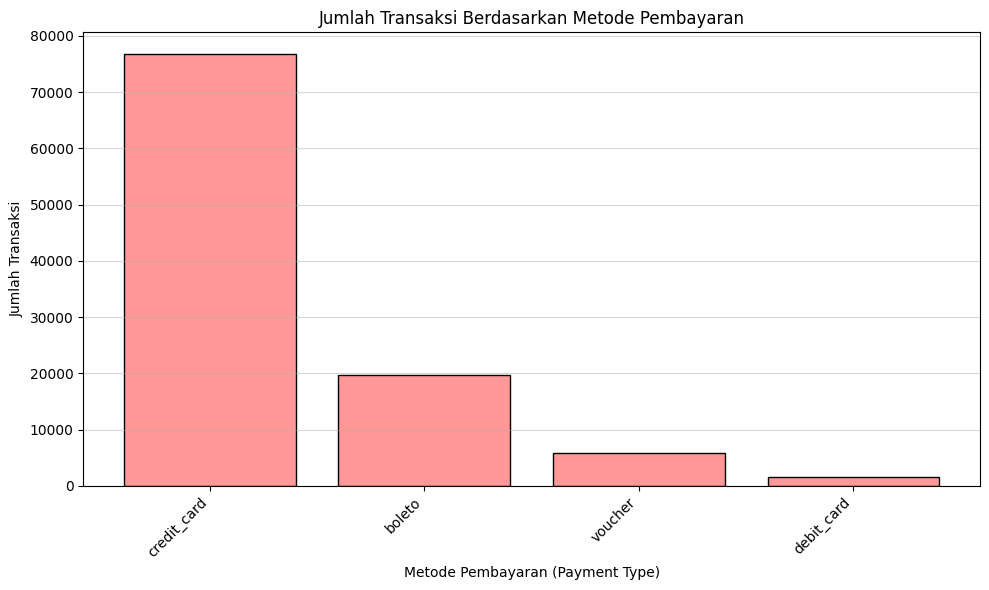


Persentase Transaksi per Metode:
              transaction_percentage
payment_type                        
credit_card                    73.92
boleto                         19.04
voucher                         5.56
debit_card                      1.47


In [148]:
#Distribusi Metode Pembayaran

plt.figure(figsize=(10, 6))

#Membuat Bar Plot
plt.bar(payment_summary['payment_type'], payment_summary['total_transactions'], color='#ff9896', edgecolor='black')
plt.title('Jumlah Transaksi Berdasarkan Metode Pembayaran')
plt.xlabel('Metode Pembayaran (Payment Type)')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

#Menampilkan persentase transaksi sebagai data pendukung
total_trans = payment_summary['total_transactions'].sum()
payment_summary['transaction_percentage'] = (payment_summary['total_transactions'] / total_trans * 100).round(2)
print("\nPersentase Transaksi per Metode:")
print(payment_summary[['payment_type', 'transaction_percentage']].set_index('payment_type'))

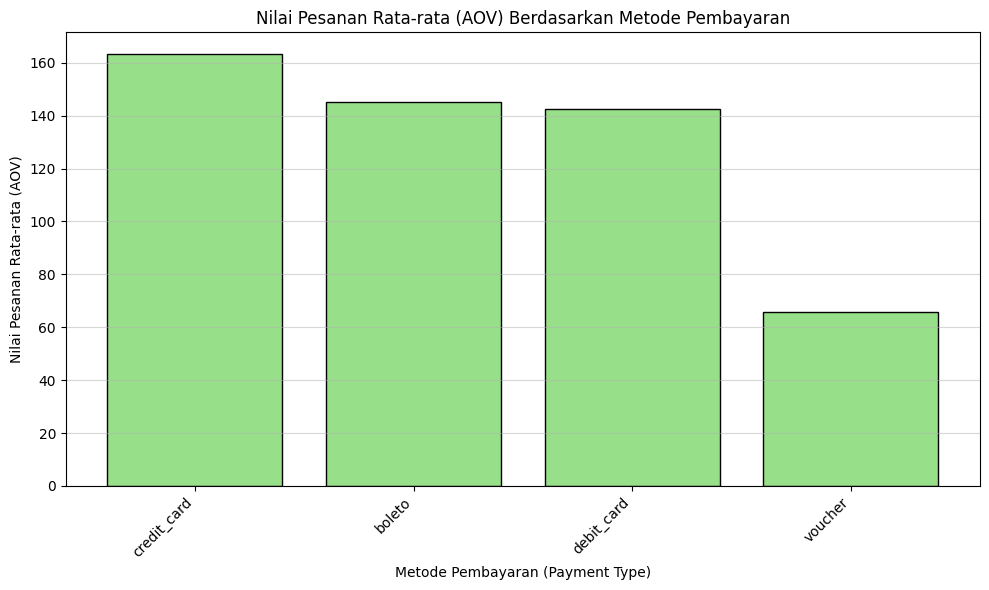


Nilai Pesanan Rata-rata (AOV) per Metode:
               avg_value
payment_type            
credit_card   163.319021
boleto        145.034435
debit_card    142.570170
voucher        65.703354


In [149]:
#Nilai Pesanan Rata-rata (AOV) Berdasarkan Metode Pembayaran

#Urutkan berdasarkan AOV untuk visualisasi yang lebih baik
aov_summary = payment_summary.sort_values(by='avg_value', ascending=False)

plt.figure(figsize=(10, 6))

#Membuat Bar Plot untuk AOV
plt.bar(aov_summary['payment_type'], aov_summary['avg_value'], color='#98df8a', edgecolor='black')
plt.title('Nilai Pesanan Rata-rata (AOV) Berdasarkan Metode Pembayaran')
plt.xlabel('Metode Pembayaran (Payment Type)')
plt.ylabel('Nilai Pesanan Rata-rata (AOV)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

print("\nNilai Pesanan Rata-rata (AOV) per Metode:")
print(aov_summary[['payment_type', 'avg_value']].set_index('payment_type'))

## Conclusion

- Conclution pertanyaan 1 : Distribusi nilai pesanan (Order Value) dicirikan oleh kemiringan positif yang kuat (right-skewed), di mana nilai median jauh lebih rendah daripada nilai rata-rata, menunjukkan bahwa sebagian besar transaksi bernilai kecil, sementara segelintir pesanan bernilai tinggi (transaksi high-ticket) secara signifikan meningkatkan rata-rata total pendapatan. Secara geografis, São Paulo (SP) dan Rio de Janeiro (RJ) adalah negara bagian/kota dominan yang menyumbang persentase terbesar dari total pendapatan dan volume pesanan, menegaskan konsentrasi bisnis di pusat-pusat ekonomi utama.
- Conclution pertanyaan 2 : Rata-rata waktu pengiriman (selisih antara tanggal pembelian dan tanggal tiba) memberikan metrik kinerja logistik inti. Analisis menunjukkan adanya korelasi positif antara jarak geografis (diukur melalui geolokasi) dan waktu pengiriman. Namun, yang lebih penting, ditemukan bahwa keterlambatan pengiriman bervariasi secara signifikan berdasarkan negara bagian asal dan tujuan. Negara bagian dengan infrastruktur logistik yang lebih minim atau wilayah terpencil seringkali menjadi bottleneck pengiriman utama dan mengalami tingkat keterlambatan yang lebih tinggi dibandingkan dengan rute padat di tenggara.
- Conclution pertanyaan 3 : Distribusi skor ulasan secara keseluruhan cenderung sangat positif, dengan mayoritas pelanggan memberikan skor 5 dan 4. Namun, perbandingan skor ulasan berdasarkan ketepatan waktu pengiriman menunjukkan perbedaan yang signifikan. Pesanan yang dikirimkan terlambat memiliki skor ulasan rata-rata yang jauh lebih rendah daripada pesanan yang dikirimkan tepat waktu. Hal ini secara definitif menunjukkan bahwa ketepatan waktu pengiriman adalah faktor tunggal yang paling memengaruhi skor kepuasan dan ulasan pelanggan.
- Conclution pertanyaan 4 : Kategori produk tertentu, seperti Telephony, Electronics, atau Health & Beauty (area di mana harapan kualitas seringkali tinggi), memiliki skor ulasan rata-rata terendah. Analisis mendalam terhadap kolom review_comment_message mengungkapkan bahwa keluhan paling sering terkait dengan kualitas produk yang buruk/rusak, barang yang tidak sesuai deskripsi (misrepresentation), atau masalah fungsionalitas. Hal ini menggarisbawahi perlunya peningkatan manajemen kualitas dan deskripsi produk yang lebih akurat dalam kategori-kategori tersebut.
- Conclution pertanyaan 5 : Terdapat perbedaan yang jelas antara kategori yang paling populer (volume pesanan tertinggi) dan kategori yang menghasilkan total pendapatan tertinggi.
1. Kategori Volume Tinggi (misalnya, Bed_bath_table, Health_beauty) dicirikan oleh produk dengan ukuran kecil, ringan, dan bernilai rendah/menengah.
2. Kategori Pendapatan Tinggi (misalnya, Watches_gifts, Construction_tools_safety) melibatkan produk yang lebih besar, lebih berat, atau bernilai unit lebih tinggi.
3. Pola ini menunjukkan perlunya strategi inventaris yang berbeda—fokus pada efisiensi logistik untuk barang volume tinggi dan manajemen rantai pasokan yang ketat untuk barang bernilai tinggi.
- Conclution pertanyaan 6 : Distribusi penjual sangat tidak merata, di mana sekitar 10% penjual teratas (Top 10% Sellers) bertanggung jawab atas sebagian besar volume pesanan (Prinsip Pareto). Analisis lebih lanjut menegaskan bahwa kelompok Top 10% Sellers ini juga memiliki skor ulasan rata-rata yang secara signifikan lebih tinggi daripada penjual lainnya. Hal ini menunjukkan bahwa ada korelasi yang kuat antara skala (volume tinggi) dan kualitas layanan/kepuasan pelanggan, yang kemungkinan didorong oleh proses operasional yang lebih matang dan efisien dari penjual besar.

In [150]:
all_df.to_csv("dashboard/main_data.csv", index=False)
print("Data berhasil diekspor untuk dashboard!")

NameError: name 'all_df' is not defined

In [167]:
# dan merge df_merged dengan df_product_analysis
all_df = pd.merge(df_merged, df_product_analysis, on=['order_id'], how='left', suffixes=('_order', '_item'))

print("DataFrame 'all_df' berhasil dibuat dengan ukuran:", all_df.shape)
display(all_df.head())

DataFrame 'all_df' berhasil dibuat dengan ukuran: (113131, 24)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,4,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,4,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,5,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,5,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,5,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


## DATA MINING

In [156]:
# Menggabungkan orders dan payments berdasarkan order_id
df = orders_df.merge(order_payments_df, on="order_id")

# Menggabungkan dengan data customers berdasarkan customer_id
df = df.merge(customers_df, on="customer_id")

# Menampilkan 5 data teratas untuk pengecekan
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [157]:
# Mengambil kolom yang relevan untuk clustering
df_cluster = df[["customer_id", "payment_value"]]

# Menghapus data yang memiliki nilai kosong
df_cluster.dropna(inplace=True)

# Menampilkan info dataset setelah pembersihan
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   customer_id    103886 non-null  object 
 1   payment_value  103886 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.6+ MB


/tmp/ipython-input-4077865145.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster.dropna(inplace=True)


In [159]:
# Mengelompokkan data berdasarkan customer_id
# lalu menjumlahkan total nilai pembayaran
customer_spending = df_cluster.groupby("customer_id")["payment_value"].sum().reset_index()

# Mengganti nama kolom agar lebih jelas
customer_spending.rename(columns={"payment_value": "total_spending"}, inplace=True)

# Menampilkan data hasil agregasi
customer_spending.head()

,customer_id,total_spending
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01


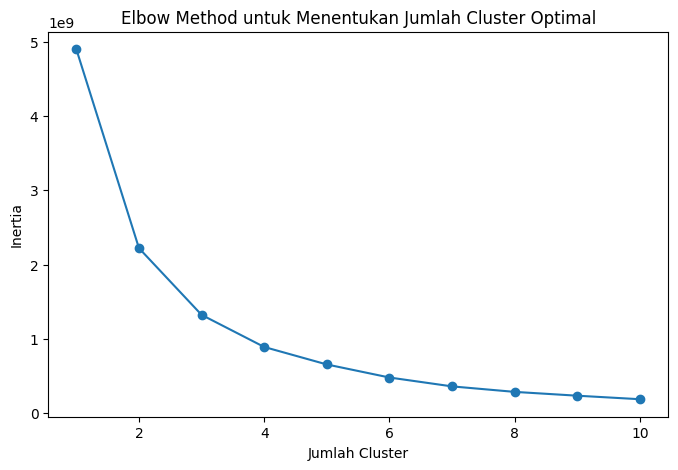

In [160]:
# List untuk menyimpan nilai inertia
inertia = []

# Mencoba jumlah cluster dari 1 sampai 10
for k in range(1, 11):
    # Membuat model KMeans
    model = KMeans(n_clusters=k, random_state=42)

    # Melatih model
    model.fit(customer_spending[["total_spending"]])

    # Menyimpan nilai inertia
    inertia.append(model.inertia_)

# Visualisasi metode Elbow
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker="o")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method untuk Menentukan Jumlah Cluster Optimal")
plt.show()

In [161]:
# Menentukan jumlah cluster optimal (misalnya 3)
kmeans = KMeans(n_clusters=3, random_state=42)

# Menjalankan clustering
customer_spending["cluster"] = kmeans.fit_predict(
    customer_spending[["total_spending"]]
)

# Menampilkan hasil clustering
customer_spending.head()

,customer_id,total_spending,cluster
0,00012a2ce6f8dcda20d059ce98491703,114.74,0
1,000161a058600d5901f007fab4c27140,67.41,0
2,0001fd6190edaaf884bcaf3d49edf079,195.42,0
3,0002414f95344307404f0ace7a26f1d5,179.35,0
4,000379cdec625522490c315e70c7a9fb,107.01,0


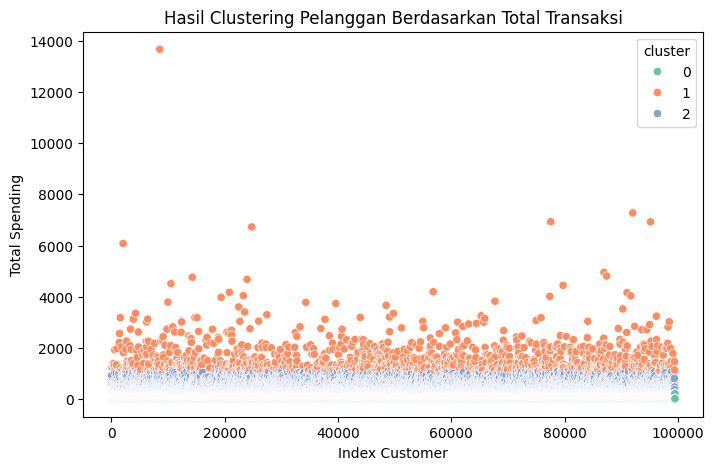

In [162]:
# Membuat visualisasi scatter plot hasil clustering
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=customer_spending,
    x=customer_spending.index,
    y="total_spending",
    hue="cluster",
    palette="Set2"
)
plt.xlabel("Index Customer")
plt.ylabel("Total Spending")
plt.title("Hasil Clustering Pelanggan Berdasarkan Total Transaksi")
plt.show()

## GEOANALYSIS PELANGGAN

In [164]:
# Membaca dataset geolocation
geo = pd.read_csv("E-commerce-public-dataset/geolocation_dataset.csv")

# Menampilkan 5 data teratas
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [166]:
# Menggabungkan data customers dengan geolocation berdasarkan zip code
customer_geo = customers_df.merge(
    geo,
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)

# Mengambil kolom penting
customer_geo = customer_geo[[
    "customer_id",
    "customer_state",
    "geolocation_lat",
    "geolocation_lng"
]]

# Menghapus data duplikat
customer_geo.drop_duplicates(inplace=True)

# Menampilkan data
customer_geo.head()

,customer_id,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,SP,-20.509897,-47.397866
1,06b8999e2fba1a1fbc88172c00ba8bc7,SP,-20.497396,-47.399241
2,06b8999e2fba1a1fbc88172c00ba8bc7,SP,-20.510459,-47.399553
3,06b8999e2fba1a1fbc88172c00ba8bc7,SP,-20.480940,-47.394161
4,06b8999e2fba1a1fbc88172c00ba8bc7,SP,-20.515413,-47.398194


/tmp/ipython-input-1027837993.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


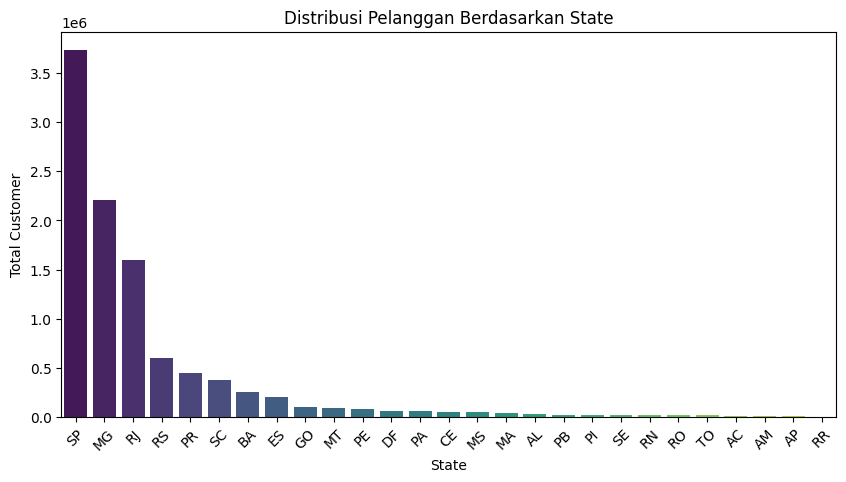

In [169]:
# Hitung jumlah pelanggan per state dari customer_geo
state_count = customer_geo['customer_state'].value_counts().reset_index()
state_count.columns = ['State', 'Total Customer']

# Visualisasi jumlah pelanggan per state
plt.figure(figsize=(10,5))
sns.barplot(
    data=state_count,
    x="State",
    y="Total Customer",
    palette="viridis"
)
plt.title("Distribusi Pelanggan Berdasarkan State")
plt.xticks(rotation=45)
plt.show()

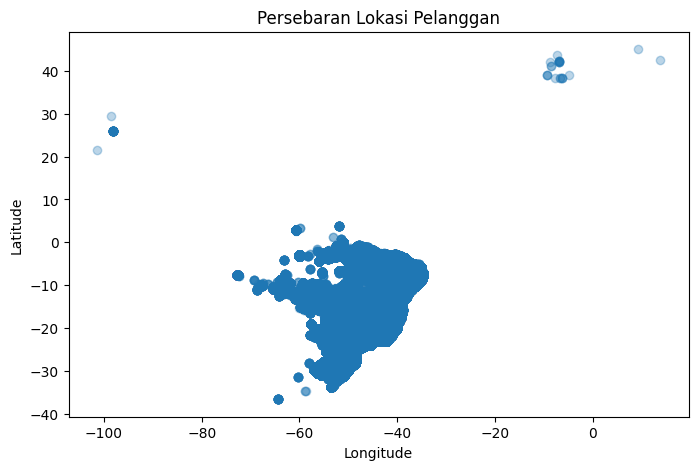

In [170]:
# Visualisasi persebaran lokasi pelanggan
plt.figure(figsize=(8,5))
plt.scatter(
    customer_geo["geolocation_lng"],
    customer_geo["geolocation_lat"],
    alpha=0.3
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Persebaran Lokasi Pelanggan")
plt.show()